# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th. Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, I suggest everyone downloads the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

--2025-04-01 16:38:25--  http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
connected. to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... 
200 OKequest sent, awaiting response... 
Length: unspecified
Saving to: ‘SUSY.csv.gz’

SUSY.csv.gz             [     <=>            ] 879.65M  2.85MB/s    in 6m 23s  

2025-04-01 16:44:48 (2.30 MB/s) - ‘SUSY.csv.gz’ saved [922377711]



In [55]:
!rm SUSY.csv

In [171]:
!gunzip SUSY.csv.gz

gzip: SUSY.csv.gz: No such file or directory


In [172]:
ls -lh

total 2.5G
-rw-r--r-- 1 cterrones cterrones 962K Apr  3 00:32 Lab.7.ipynb
-rw-r--r-- 1 cterrones cterrones 5.9M Mar 19 11:17 Lab.7.pdf
-rw-r--r-- 1 cterrones cterrones 228M Apr  3 00:31 SUSY-small.csv
-rw-r--r-- 1 cterrones cterrones 2.3G Apr  1 16:44 SUSY.csv


The data is provided as a comma separated file.

In [1]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

# Reducing the dataset
This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [2]:
!ls -lh

total 2.5G
-rw-r--r-- 1 cterrones cterrones 3.0M Apr 10 20:15 Lab.7.ipynb
-rw-r--r-- 1 cterrones cterrones 5.9M Mar 19 11:17 Lab.7.pdf
-rw-r--r-- 1 cterrones cterrones 228M Apr 10 18:06 SUSY-small.csv
-rw-r--r-- 1 cterrones cterrones 2.3G Apr  1 16:44 SUSY.csv


We see that we have 5 million datapoints.

In [3]:
!wc -l SUSY.csv

5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [4]:
!head -500000 SUSY.csv > SUSY-small.csv

In [5]:
ls -lh

total 2.5G
-rw-r--r-- 1 cterrones cterrones 3.0M Apr 10 20:15 Lab.7.ipynb
-rw-r--r-- 1 cterrones cterrones 5.9M Mar 19 11:17 Lab.7.pdf
-rw-r--r-- 1 cterrones cterrones 228M Apr 10 20:16 SUSY-small.csv
-rw-r--r-- 1 cterrones cterrones 2.3G Apr  1 16:44 SUSY.csv


In [6]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [7]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [8]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [9]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [10]:
FeatureNames

['axial_MET',
 'S_R',
 'cos_theta_r1',
 'MET_rel',
 'M_R',
 'dPhi_r_b',
 'MT2',
 'R',
 'M_TR_2',
 'M_Delta_R']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [12]:
filename = "SUSY-small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [13]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.0,0.719035,1.091879,0.291540,1.205962,-1.599117,-1.139445,0.424546,1.154849,0.637185,-0.091178,1.972156,0.697028,0.313636,0.988602,1.981573,0.744828,1.095080,0.006546
499996,1.0,0.910016,-0.364544,-0.777120,0.543648,-0.910632,-1.723707,2.864673,1.458272,2.176558,-0.590911,0.673695,1.662140,2.189362,1.195041,0.910815,1.181893,1.252362,0.826035
499997,1.0,0.842954,0.332476,-1.048564,1.347989,0.320496,-0.666358,0.450433,-0.411872,0.293407,0.630491,0.859920,0.403371,0.416258,0.591989,0.372003,0.716788,0.366991,0.265798
499998,0.0,1.370760,-1.162912,0.893499,2.118091,1.248496,-0.887211,0.164659,0.316840,0.215165,0.280418,3.087083,0.526929,0.151467,0.308067,3.098183,0.233042,0.876216,0.000593


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [14]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


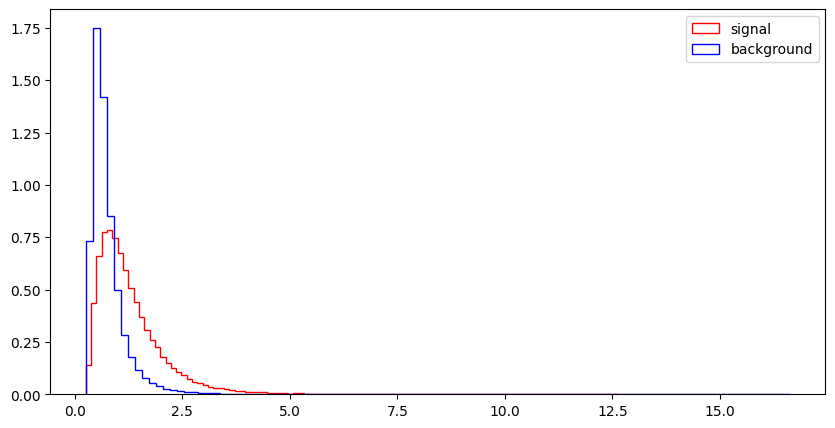

l_1_eta


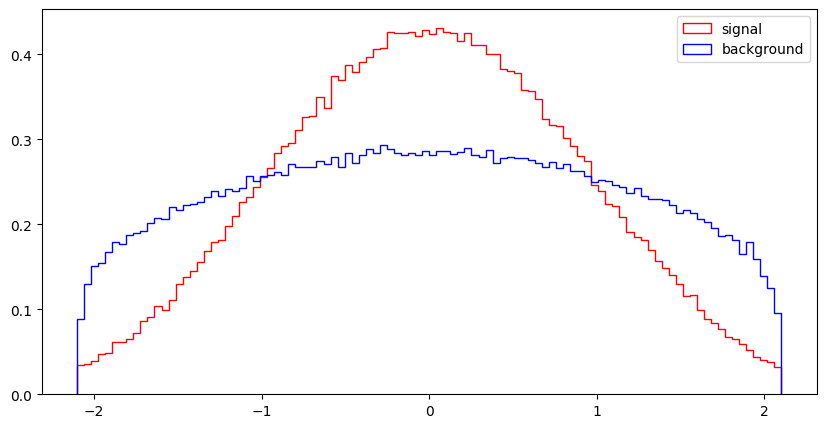

l_1_phi


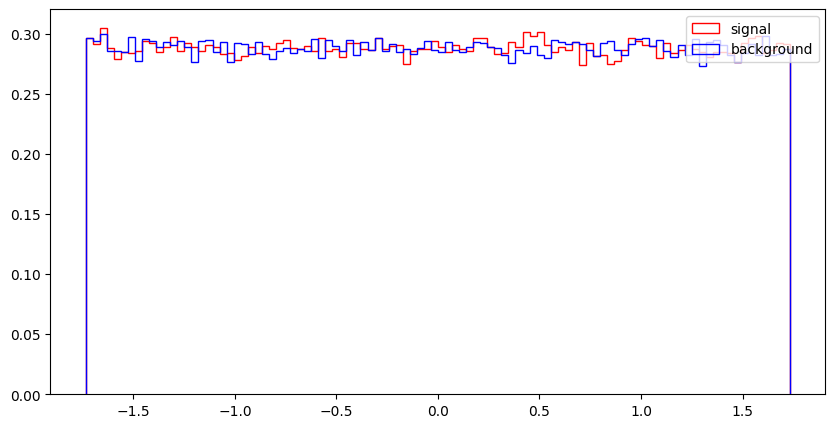

l_2_pT


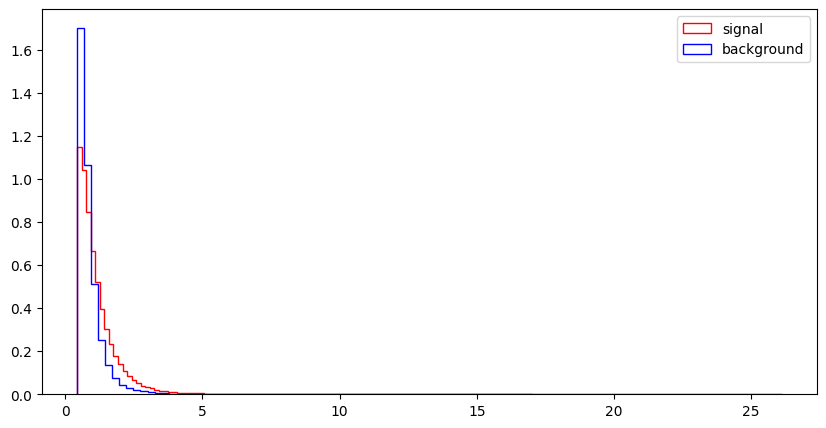

l_2_eta


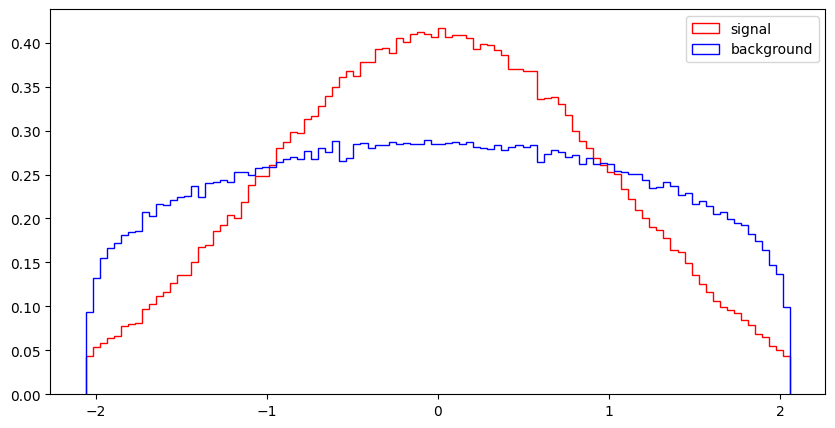

l_2_phi


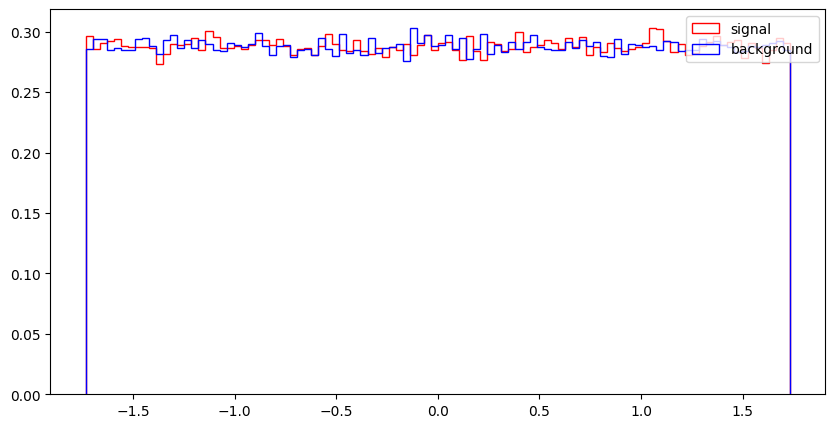

MET


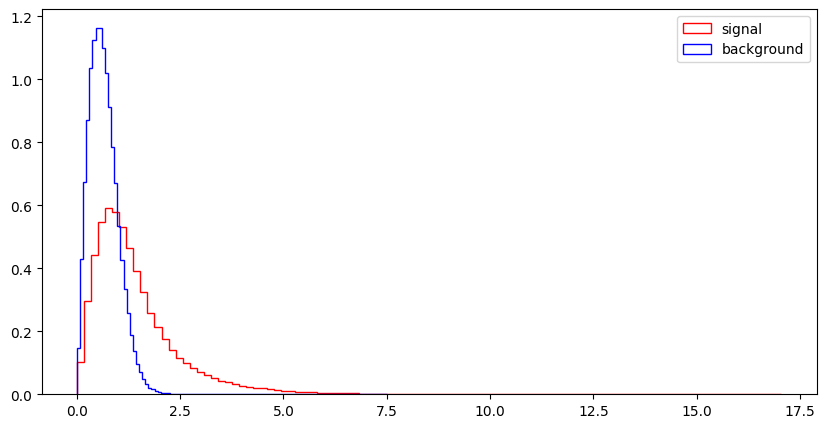

MET_phi


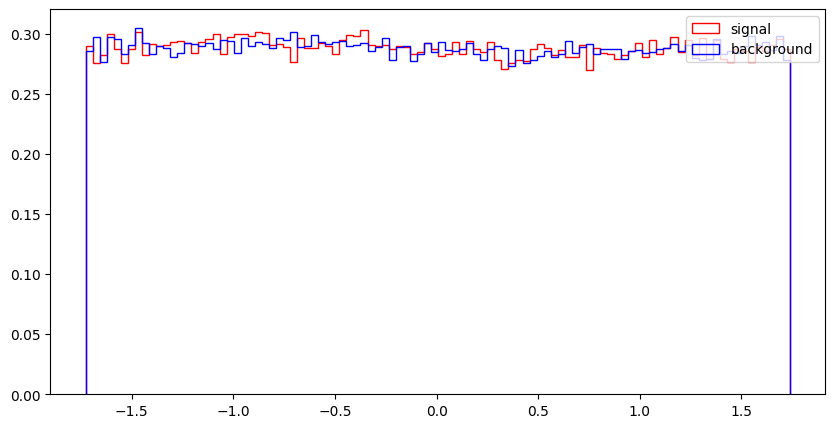

MET_rel


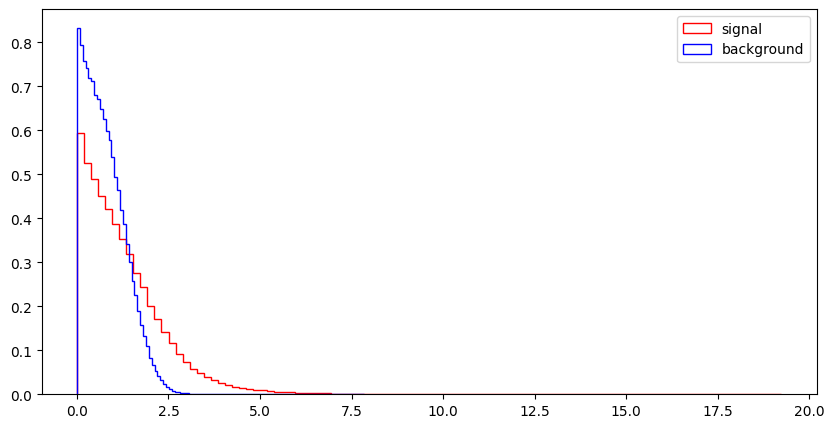

axial_MET


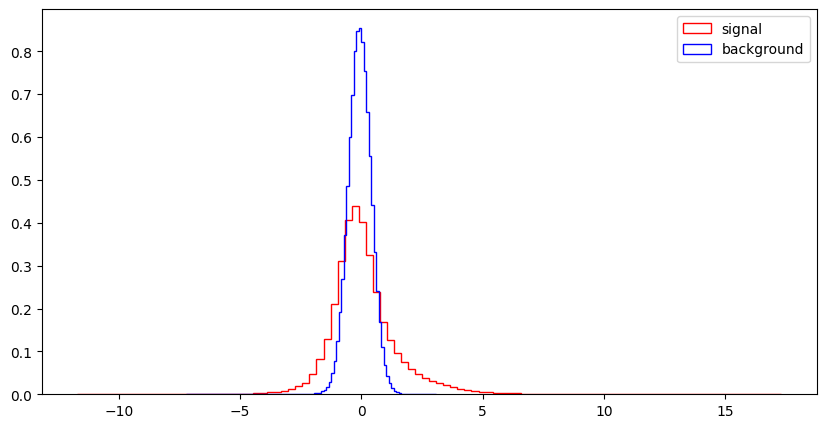

M_R


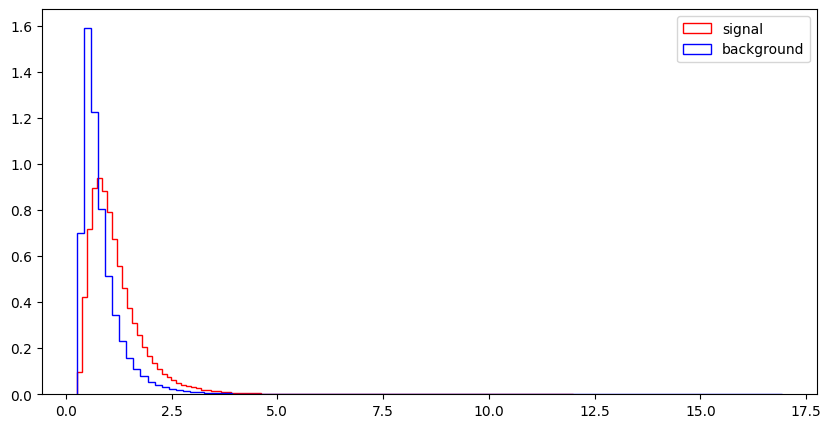

M_TR_2


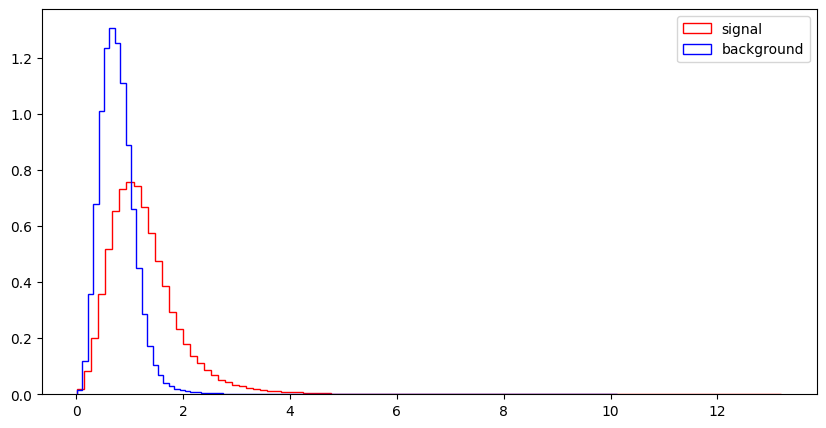

R


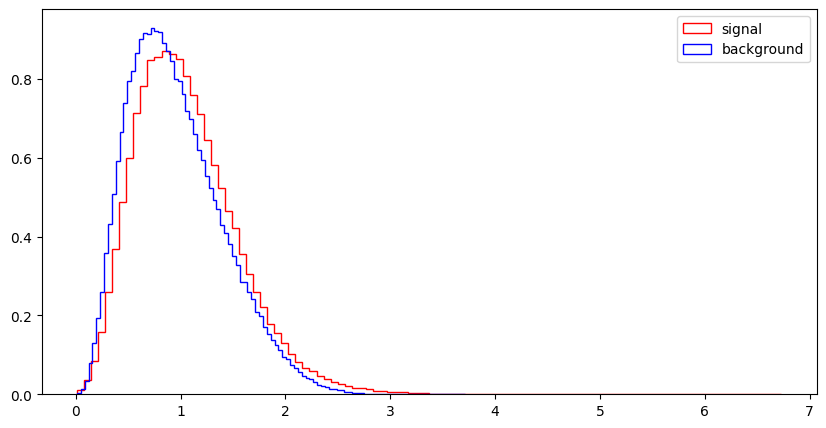

MT2


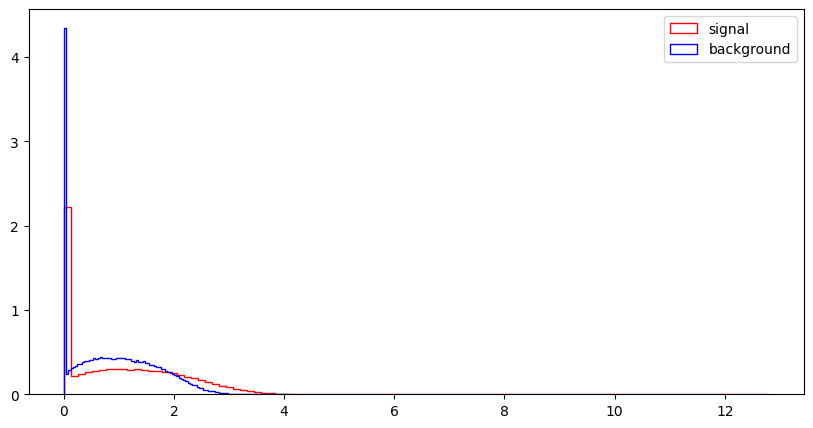

S_R


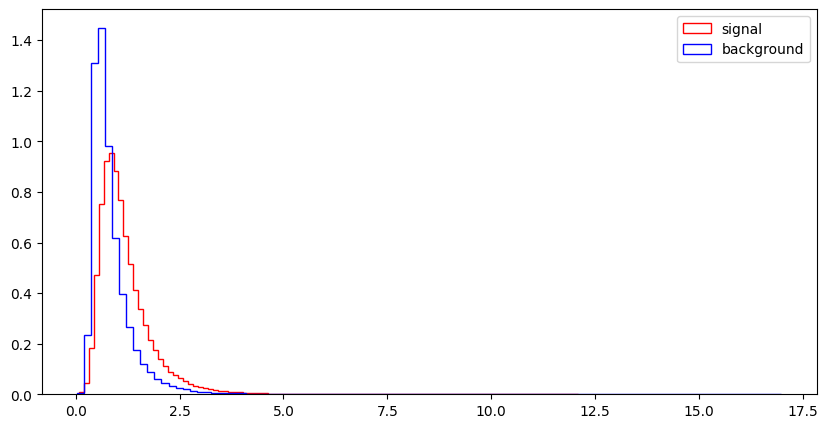

M_Delta_R


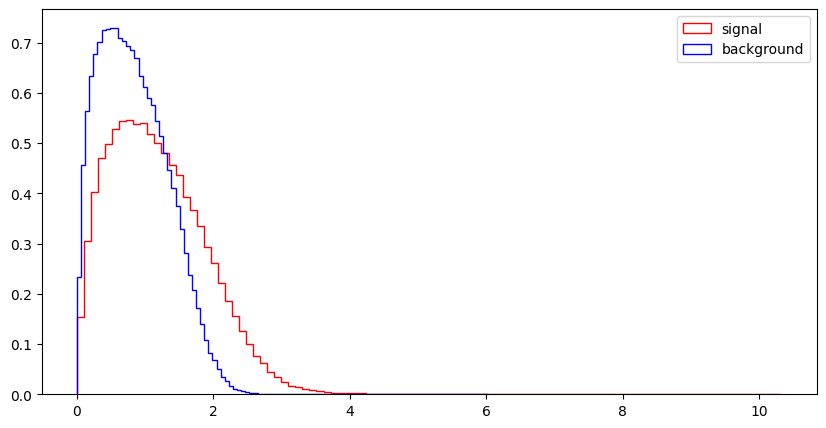

dPhi_r_b


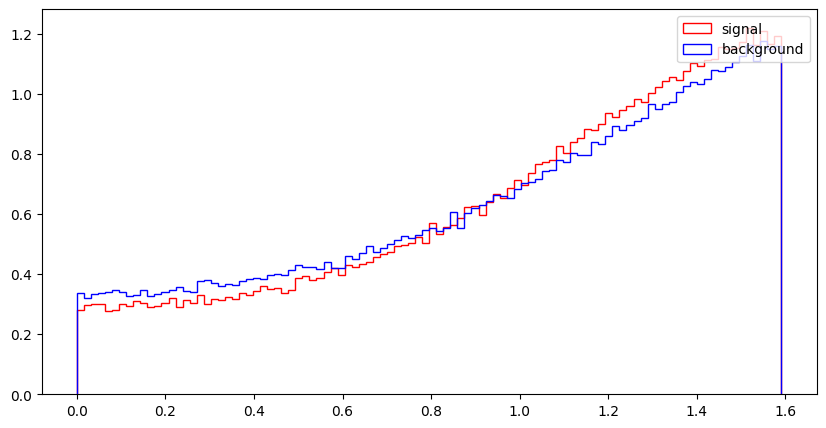

cos_theta_r1


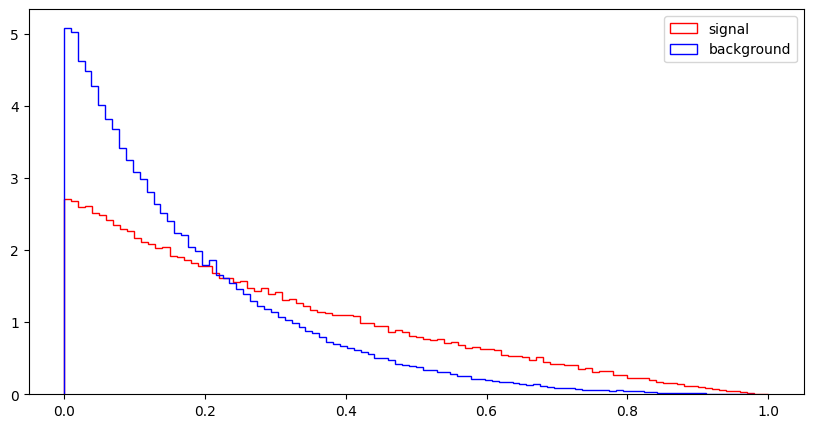

In [15]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

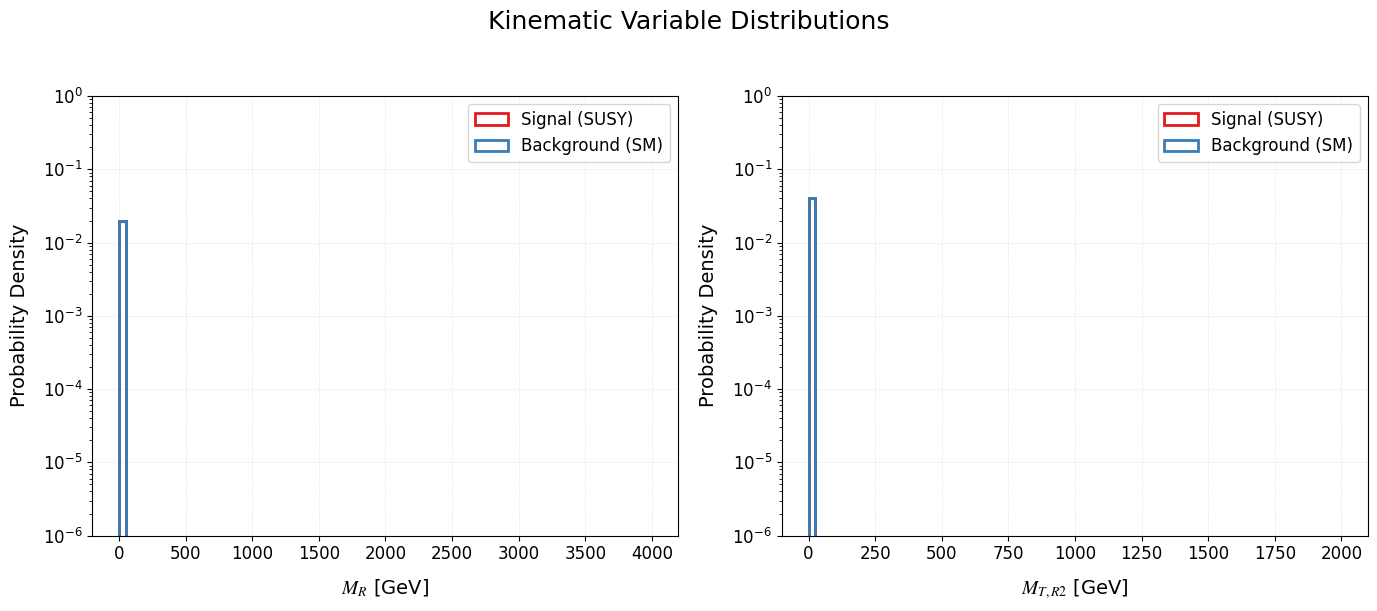

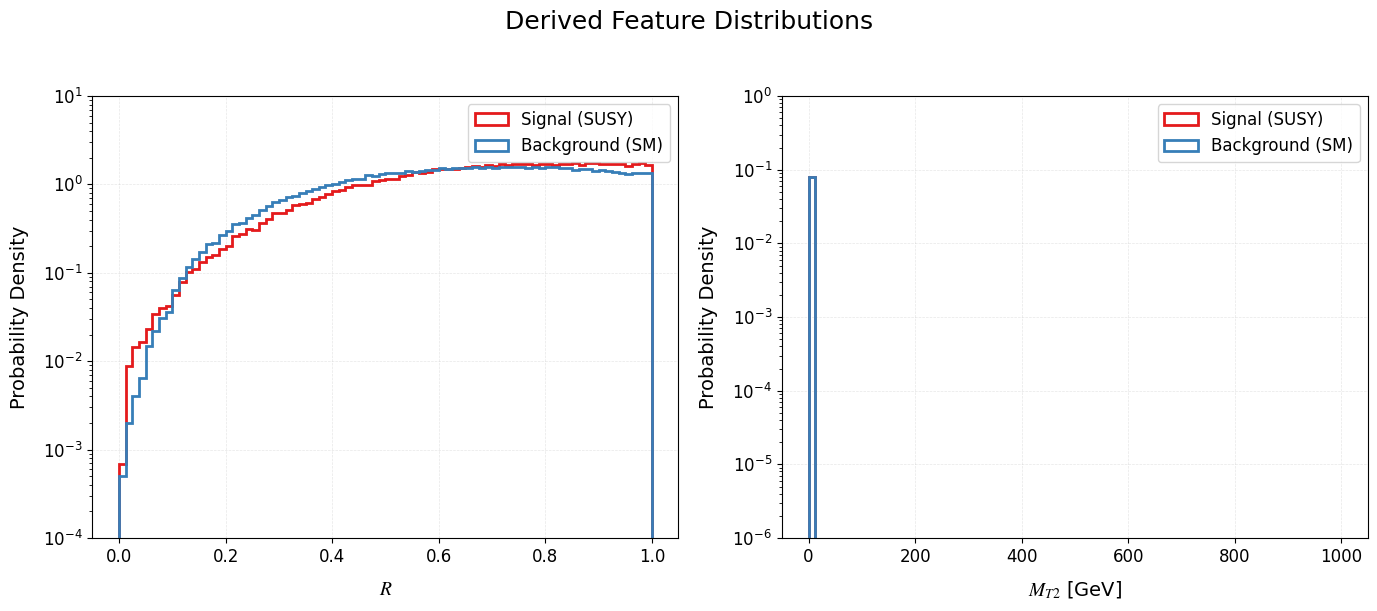

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams


# update font settings
rcParams.update({
    'font.family': 'sans-serif', 
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans'],
    'mathtext.fontset': 'stix',  # math symbols
})

# set up matplotlib style parameters
rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 18,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'grid.linewidth': 0.5
})

def plot_hist(data, var_name, color, label, bins=100, range=None, ax=None, linewidth=2):
    """histogram plotting function control"""
    if ax is None:
        ax = plt.gca()
    
    ax.hist(
        np.array(data[var_name]),
        bins=bins,
        histtype="step",
        color=color,
        label=label,
        density=True,
        range=range,
        linewidth=linewidth
    )
    return ax

# ---------- Figure 5: Kinematic Variables ------------
fig5, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig5.suptitle("Kinematic Variable Distributions", y=1.02)

# M_R distribution
plot_hist(df_sig, "M_R", "#E41A1C", "Signal (SUSY)", 
          bins=np.linspace(0, 4000, 81), ax=ax1)
plot_hist(df_bkg, "M_R", "#377EB8", "Background (SM)", 
          bins=np.linspace(0, 4000, 81), ax=ax1)
ax1.set_xlabel(r"$M_R$ [GeV]", labelpad=10)
ax1.set_ylabel("Probability Density", labelpad=10)
ax1.legend(loc="upper right", frameon=True)
ax1.set_yscale('log')
ax1.set_ylim(1e-6, 1)

# M_TR_2 distribution
plot_hist(df_sig, "M_TR_2", "#E41A1C", "Signal (SUSY)", 
          bins=np.linspace(0, 2000, 81), ax=ax2)
plot_hist(df_bkg, "M_TR_2", "#377EB8", "Background (SM)", 
          bins=np.linspace(0, 2000, 81), ax=ax2)
ax2.set_xlabel(r"$M_{T,R2}$ [GeV]", labelpad=10)
ax2.set_ylabel("Probability Density", labelpad=10)
ax2.legend(loc="upper right", frameon=True)
ax2.set_yscale('log')
ax2.set_ylim(1e-6, 1)

plt.tight_layout()

# ---------- Figure 6, Derived Features -------------
fig6, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig6.suptitle("Derived Feature Distributions", y=1.02)

# R distribution
plot_hist(df_sig, "R", "#E41A1C", "Signal (SUSY)", 
          bins=np.linspace(0, 1, 81), ax=ax1)
plot_hist(df_bkg, "R", "#377EB8", "Background (SM)", 
          bins=np.linspace(0, 1, 81), ax=ax1)
ax1.set_xlabel(r"$R$", labelpad=10)
ax1.set_ylabel("Probability Density", labelpad=10)
ax1.legend(loc="upper right", frameon=True)
ax1.set_yscale('log')
ax1.set_ylim(1e-4, 10)

# MT2 distribution
plot_hist(df_sig, "MT2", "#E41A1C", "Signal (SUSY)", 
          bins=np.linspace(0, 1000, 81), ax=ax2)
plot_hist(df_bkg, "MT2", "#377EB8", "Background (SM)", 
          bins=np.linspace(0, 1000, 81), ax=ax2)
ax2.set_xlabel(r"$M_{T2}$ [GeV]", labelpad=10)
ax2.set_ylabel("Probability Density", labelpad=10)
ax2.legend(loc="upper right", frameon=True)
ax2.set_yscale('log')
ax2.set_ylim(1e-6, 1)

plt.tight_layout()
plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

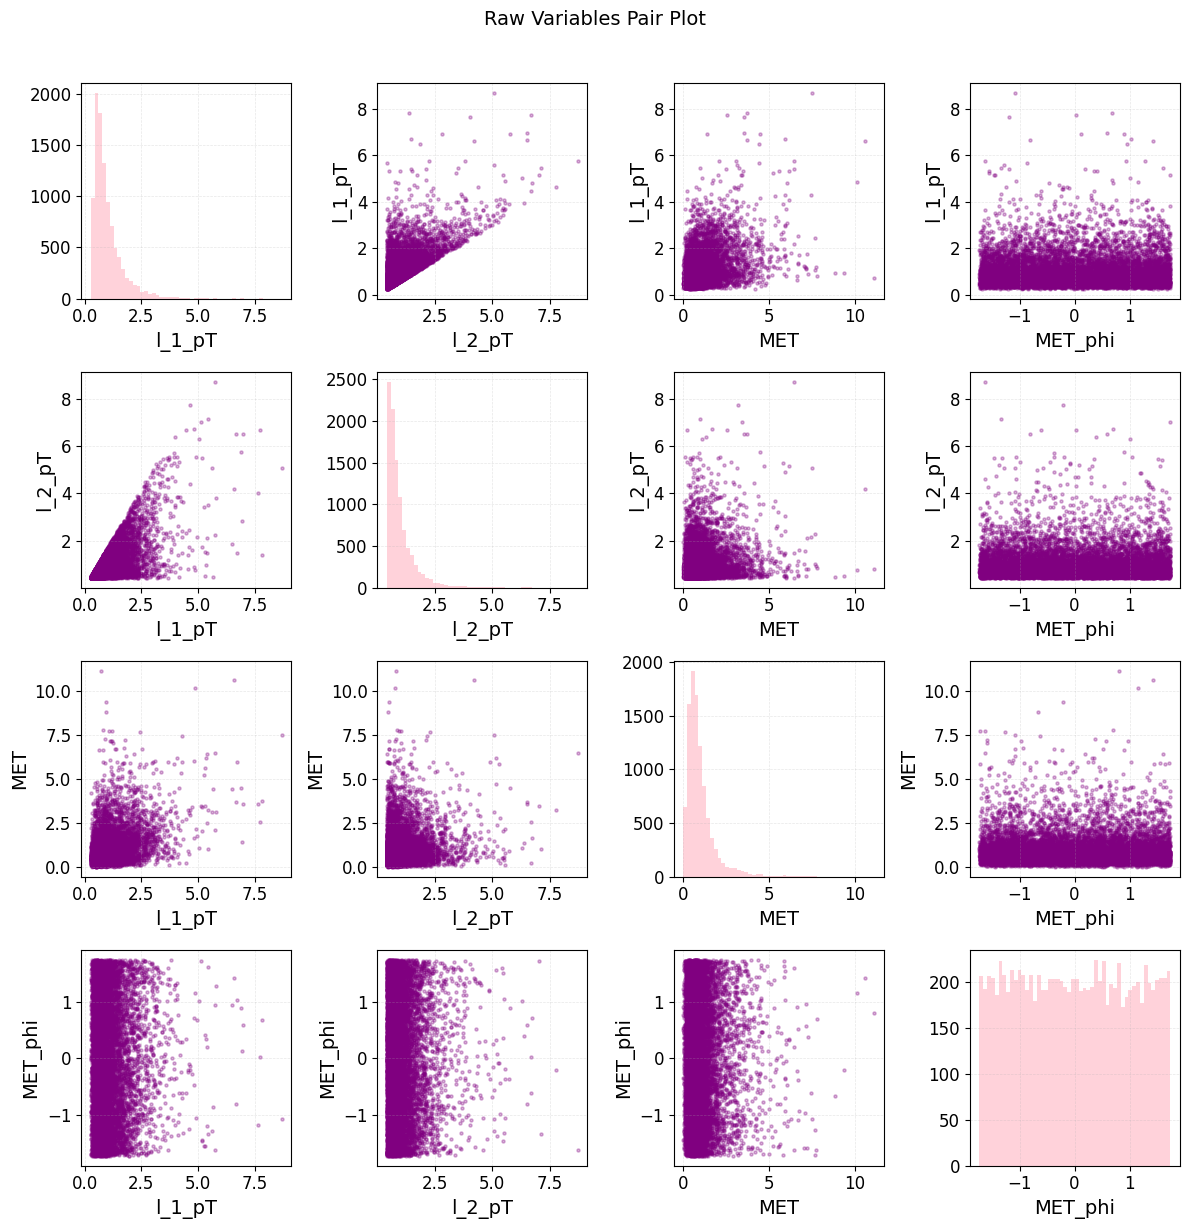

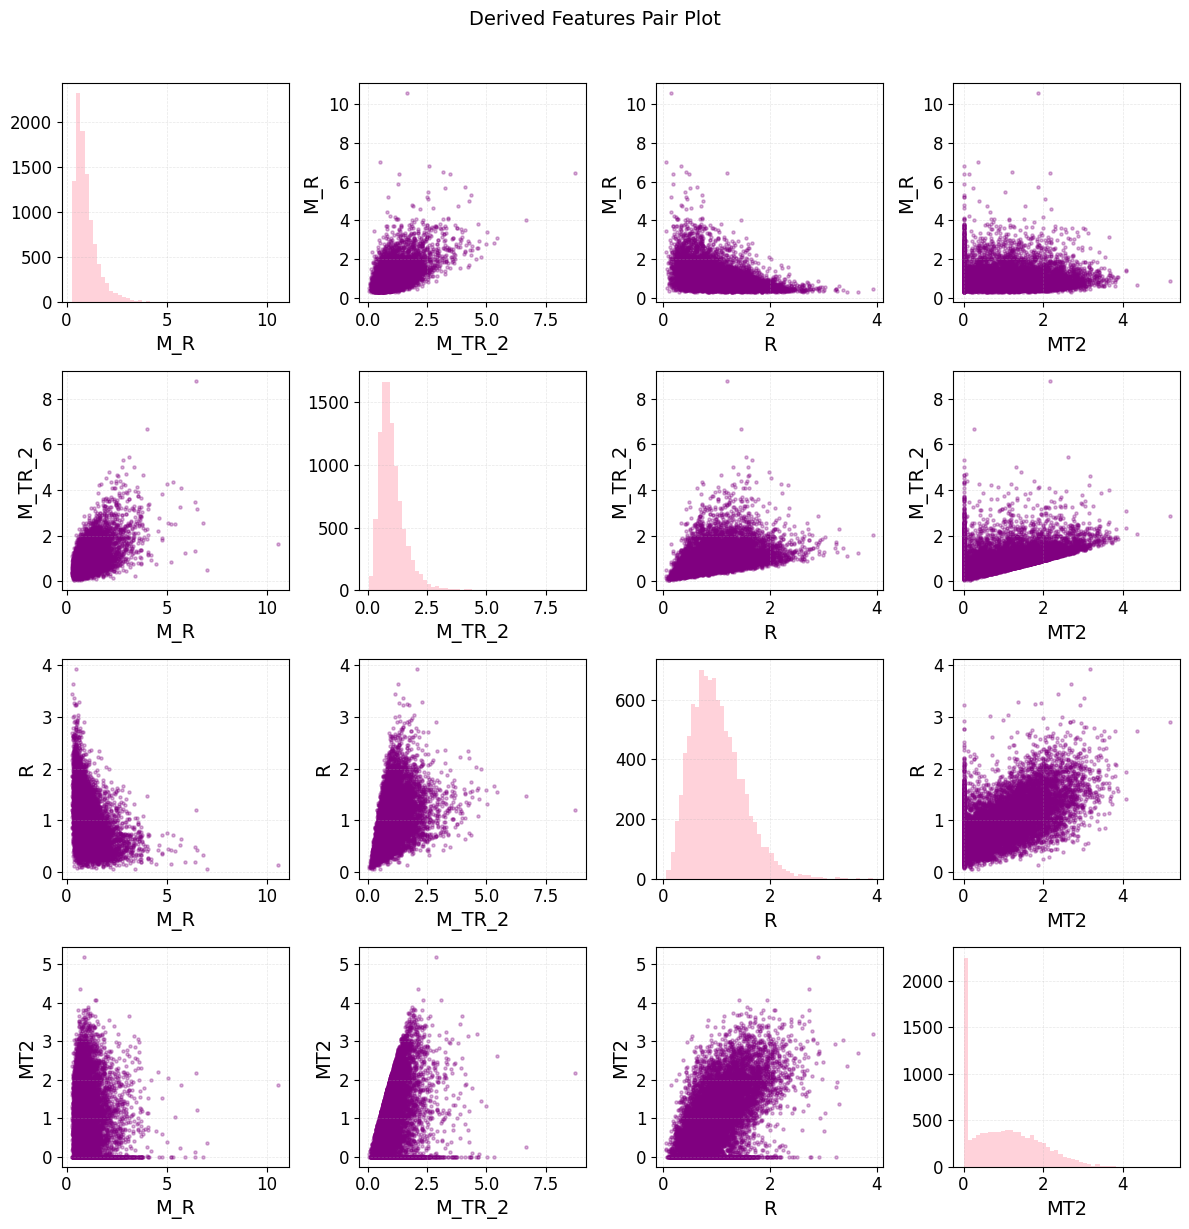

In [17]:
# Part 4.1 a
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# plot settings
rcParams.update({
    'font.size': 10,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linestyle': '--'
})

def create_pair_plots(data, variables, title, max_points=10000):
    """
    creating pair plots without using seaborn.
    
    Args:
        data: dataFrame containing the data
        variables: List of variables to plot
        title: title for the figure
        max_points: maximum number of points to plot (for performance)
    """
    n_vars = len(variables)
    fig, axes = plt.subplots(n_vars, n_vars, figsize=(12, 12))
    fig.suptitle(title, y=1.02, fontsize=14)
    
    # subsample if too many points
    plot_data = data.sample(min(len(data), max_points)) if max_points else data
    
    for i, var1 in enumerate(variables):
        for j, var2 in enumerate(variables):
            ax = axes[i,j]
            
            if i == j:
                # diagonal - histograms
                ax.hist(plot_data[var1], bins=50, color='pink', alpha=0.7)
                ax.set_xlabel(var1)
            else:
                # Off diagonal - scatter plots
                ax.scatter(plot_data[var2], plot_data[var1], 
                           s=5, alpha=0.3, color='purple')
                ax.set_xlabel(var2)
                ax.set_ylabel(var1)
    
    plt.tight_layout()
    return fig

# define variable groups
raw_vars = ['l_1_pT', 'l_2_pT', 'MET', 'MET_phi']
feature_vars = ['M_R', 'M_TR_2', 'R', 'MT2']

# create plots
fig_raw = create_pair_plots(df, raw_vars, "Raw Variables Pair Plot")
fig_features = create_pair_plots(df, feature_vars, "Derived Features Pair Plot")
plt.show()

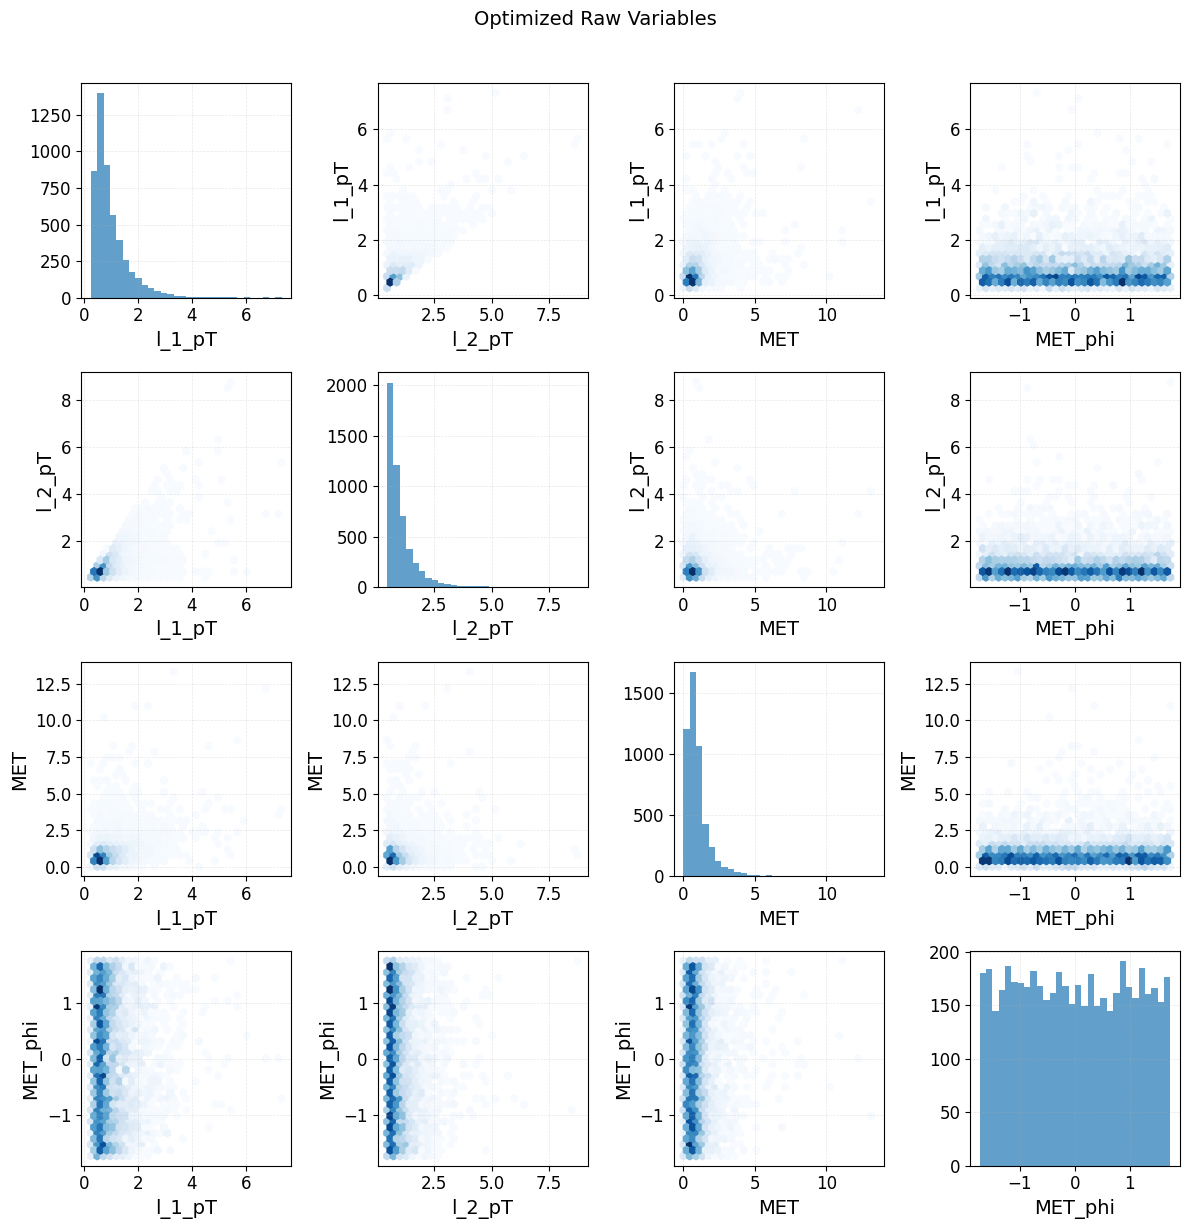

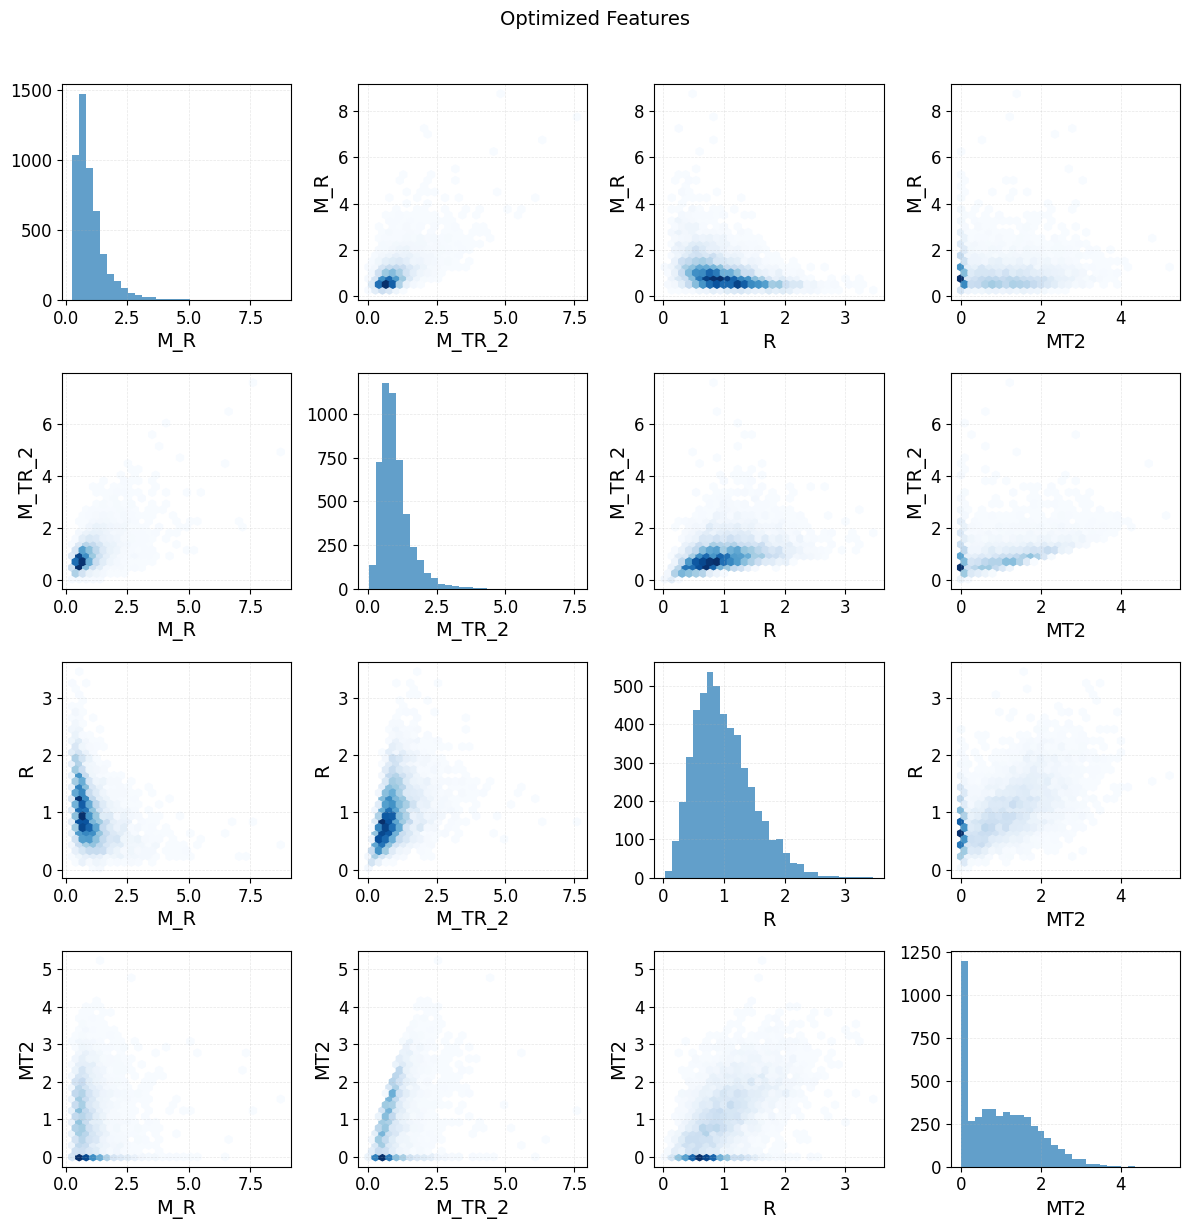

In [18]:
# Part 4.1 b
def create_pair_plots_optimized(data, variables, title, max_points=5000, bins=30):
    """ optimized version of pair plots"""
    n_vars = len(variables)
    fig, axes = plt.subplots(n_vars, n_vars, figsize=(12, 12))
    fig.suptitle(title, y=1.02, fontsize=14)
    
    # use numpy arrays for faster access
    plot_data = data.sample(min(len(data), max_points))[variables].values
    
    for i in range(n_vars):
        for j in range(n_vars):
            ax = axes[i,j]
            
            if i == j:
                # faster histogram using numpy
                counts, edges = np.histogram(plot_data[:,i], bins=bins)
                ax.stairs(counts, edges, fill=True, alpha=0.7)
                ax.set_xlabel(variables[i])
            else:
                # hexbin for better performance with many points
                hb = ax.hexbin(plot_data[:,j], plot_data[:,i], 
                              gridsize=30, cmap='Blues', mincnt=1)
                ax.set_xlabel(variables[j])
                ax.set_ylabel(variables[i])
    
    plt.tight_layout()
    return fig

# optimized plots
fig_raw_opt = create_pair_plots_optimized(df, raw_vars, "Optimized Raw Variables")
fig_features_opt = create_pair_plots_optimized(df, feature_vars, "Optimized Features")
plt.show()

In [19]:
# Part 4.1 c
def analyze_separation(data_sig, data_bkg, variables):
    """Analyze which variables best separate signal and background"""
    separation_power = {}
    
    for var in variables:
        # calculate separation as difference in means divided by combined std
        mean_sig = data_sig[var].mean()
        mean_bkg = data_bkg[var].mean()
        std_sig = data_sig[var].std()
        std_bkg = data_bkg[var].std()
        
        separation = abs(mean_sig - mean_bkg) / np.sqrt(std_sig**2 + std_bkg**2)
        separation_power[var] = separation
    
    # sort by separation power
    sorted_separation = sorted(separation_power.items(), key=lambda x: x[1], reverse=True)
    
    print("Variable separation power (higher is better):")
    for var, sep in sorted_separation:
        print(f"{var:15}: {sep:.3f}")
    
    return sorted_separation

# analyze all variables
all_vars = ['l_1_pT', 'l_2_pT', 'MET', 'MET_phi', 
            'M_R', 'M_TR_2', 'R', 'MT2', 'MET_rel', 'axial_MET']

separation_results = analyze_separation(df_sig, df_bkg, all_vars)

Variable separation power (higher is better):
MET            : 0.671
M_TR_2         : 0.651
l_1_pT         : 0.589
MET_rel        : 0.408
M_R            : 0.395
l_2_pT         : 0.281
R              : 0.155
MT2            : 0.112
axial_MET      : 0.109
MET_phi        : 0.001


### Exercise 4.2


### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 


In [20]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable


Hint: Example code for embedding a `tabulate` table into a notebook:

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

In [21]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from IPython.display import HTML, display

# define variable groups
raw_vars = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
feature_vars = ['MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1']

# compute covariance and correlation matrices for all variables
cov_matrix_all = np.cov(df[raw_vars + feature_vars].values.T)
corr_matrix_all = np.corrcoef(df[raw_vars + feature_vars].values.T)

# Compute for raw variables only
cov_matrix_raw = np.cov(df[raw_vars].values.T)
corr_matrix_raw = np.corrcoef(df[raw_vars].values.T)

# compute for features only
cov_matrix_features = np.cov(df[feature_vars].values.T)
corr_matrix_features = np.corrcoef(df[feature_vars].values.T)

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.


In [22]:
def format_matrix_table(matrix, variables, title, matrix_type='correlation'):
    """Format a matrix as a nice HTML table"""
    # create headers
    headers = [''] + variables
    
    # format numbers with appropriate precision
    if matrix_type == 'correlation':
        formatted_values = [[f"{val:.3f}" for val in row] for row in matrix]
    else:  # covariance
        formatted_values = [[f"{val:.2e}" for val in row] for row in matrix]
    
    # add variable names to each row
    table_data = [[var] + row for var, row in zip(variables, formatted_values)]
    
    # create HTML table
    html_table = tabulate(table_data, headers=headers, tablefmt='html')
    
    # display with title
    display(HTML(f"<h3>{title}</h3>"))
    display(HTML(html_table))

# display all correlation matrices
format_matrix_table(corr_matrix_raw, raw_vars, "Correlation Matrix (Raw Variables)")
format_matrix_table(corr_matrix_features, feature_vars, "Correlation Matrix (Derived Features)")

# display all covariance matrices
format_matrix_table(cov_matrix_raw, raw_vars, "Covariance Matrix (Raw Variables)", matrix_type='covariance')
format_matrix_table(cov_matrix_features, feature_vars, "Covariance Matrix (Derived Features)", matrix_type='covariance')

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,1,-0.001,0,0.684,-0.001,0.001,0.383,-0.001
l_1_eta,-0.001,1,-0.001,-0,0.406,-0.001,-0.002,-0.001
l_1_phi,0,-0.001,1,0.002,0,-0.266,0.001,-0.184
l_2_pT,0.684,-0,0.002,1,-0.001,0,0.14,-0.002
l_2_eta,-0.001,0.406,0,-0.001,1,0,0,-0
l_2_phi,0.001,-0.001,-0.266,0,0,1,-0,-0.035
MET,0.383,-0.002,0.001,0.14,0,-0,1,-0.003
MET_phi,-0.001,-0.001,-0.184,-0.002,-0,-0.035,-0.003,1


,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
MET_rel,1,-0.134,0.078,0.584,0.595,0.535,0.15,0.748,0.378,0.316
axial_MET,-0.134,1,0.027,-0.317,-0.383,-0.535,-0.067,-0.373,-0.057,-0.272
M_R,0.078,0.027,1,0.577,-0.383,-0.068,0.981,0.189,-0.106,-0.116
M_TR_2,0.584,-0.317,0.577,1,0.38,0.379,0.635,0.668,0.229,0.451
R,0.595,-0.383,-0.383,0.38,1,0.574,-0.287,0.564,0.424,0.627
MT2,0.535,-0.535,-0.068,0.379,0.574,1,-0.021,0.809,0.056,0.264
S_R,0.15,-0.067,0.981,0.635,-0.287,-0.021,1,0.249,-0.013,-0.085
M_Delta_R,0.748,-0.373,0.189,0.668,0.564,0.809,0.249,1,0.155,0.319
dPhi_r_b,0.378,-0.057,-0.106,0.229,0.424,0.056,-0.013,0.155,1,0.106
cos_theta_r1,0.316,-0.272,-0.116,0.451,0.627,0.264,-0.085,0.319,0.106,1


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,0.467,-0.000397,7.66e-05,0.305,-0.000349,0.000737,0.228,-0.000937
l_1_eta,-0.000397,1,-0.000858,-0.000163,0.408,-0.00104,-0.00215,-0.000589
l_1_phi,7.66e-05,-0.000858,1,0.00131,0.000251,-0.267,0.000766,-0.185
l_2_pT,0.305,-0.000163,0.00131,0.425,-0.000576,0.000156,0.0795,-0.00156
l_2_eta,-0.000349,0.408,0.000251,-0.000576,1.01,0.000442,0.000382,-0.000322
l_2_phi,0.000737,-0.00104,-0.267,0.000156,0.000442,1,-0.000304,-0.0354
MET,0.228,-0.00215,0.000766,0.0795,0.000382,-0.000304,0.762,-0.00279
MET_phi,-0.000937,-0.000589,-0.185,-0.00156,-0.000322,-0.0354,-0.00279,1


,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
MET_rel,0.79,-0.12,0.0437,0.302,0.249,0.409,0.0823,0.415,0.146,0.0553
axial_MET,-0.12,1.01,0.0171,-0.185,-0.181,-0.461,-0.0414,-0.233,-0.0251,-0.0537
M_R,0.0437,0.0171,0.392,0.21,-0.113,-0.0365,0.38,0.0739,-0.029,-0.0143
M_TR_2,0.302,-0.185,0.21,0.338,0.104,0.189,0.228,0.242,0.0581,0.0517
R,0.249,-0.181,-0.113,0.104,0.222,0.232,-0.0834,0.165,0.0871,0.0582
MT2,0.409,-0.461,-0.0365,0.189,0.232,0.738,-0.011,0.433,0.0209,0.0446
S_R,0.0823,-0.0414,0.38,0.228,-0.0834,-0.011,0.382,0.0958,-0.00346,-0.0104
M_Delta_R,0.415,-0.233,0.0739,0.242,0.165,0.433,0.0958,0.389,0.0422,0.0392
dPhi_r_b,0.146,-0.0251,-0.029,0.0581,0.0871,0.0209,-0.00346,0.0422,0.19,0.00908
cos_theta_r1,0.0553,-0.0537,-0.0143,0.0517,0.0582,0.0446,-0.0104,0.0392,0.00908,0.0388



#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a tabulate table into a notebook:

In [23]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


In [24]:
# PART 4.1 d
import tabulate
def format_matrix_table(matrix, variables, title, matrix_type='correlation'):
    """Format a matrix as a nice HTML table"""
    # Create headers
    headers = [''] + variables
    
    # format numbers with appropriate precision
    if matrix_type == 'correlation':
        formatted_values = [[f"{val:.3f}" for val in row] for row in matrix]
    else:  # covariance
        formatted_values = [[f"{val:.2e}" for val in row] for row in matrix]
    
    # add variable names to each row
    table_data = [[var] + row for var, row in zip(variables, formatted_values)]
    
    # create HTML table (using tabulate.tabulate instead of tabulate)
    html_table = tabulate.tabulate(table_data, headers=headers, tablefmt='html')
    
    # display with title
    display(HTML(f"<h3>{title}</h3>"))
    display(HTML(html_table))

def analyze_covariance_correlation(data, variables, title_prefix=""):
    """
    Perform covariance and correlation analysis and display formatted tables
    
    Args:
        data: Pandas DataFrame containing the data
        variables: List of variables to analyze
    """
    # compute matrices
    cov_matrix = np.cov(data[variables].values.T)
    corr_matrix = np.corrcoef(data[variables].values.T)
    
    # display tables
    format_matrix_table(
        corr_matrix, variables, 
        f"{title_prefix}Correlation Matrix", 
        matrix_type='correlation'
    )
    
    format_matrix_table(
        cov_matrix, variables,
        f"{title_prefix}Covariance Matrix",
        matrix_type='covariance'
    )

# Example:
analyze_covariance_correlation(df, raw_vars, "Raw Variables - ")
analyze_covariance_correlation(df, feature_vars, "Derived Features - ")

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,1,-0.001,0,0.684,-0.001,0.001,0.383,-0.001
l_1_eta,-0.001,1,-0.001,-0,0.406,-0.001,-0.002,-0.001
l_1_phi,0,-0.001,1,0.002,0,-0.266,0.001,-0.184
l_2_pT,0.684,-0,0.002,1,-0.001,0,0.14,-0.002
l_2_eta,-0.001,0.406,0,-0.001,1,0,0,-0
l_2_phi,0.001,-0.001,-0.266,0,0,1,-0,-0.035
MET,0.383,-0.002,0.001,0.14,0,-0,1,-0.003
MET_phi,-0.001,-0.001,-0.184,-0.002,-0,-0.035,-0.003,1


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,0.467,-0.000397,7.66e-05,0.305,-0.000349,0.000737,0.228,-0.000937
l_1_eta,-0.000397,1,-0.000858,-0.000163,0.408,-0.00104,-0.00215,-0.000589
l_1_phi,7.66e-05,-0.000858,1,0.00131,0.000251,-0.267,0.000766,-0.185
l_2_pT,0.305,-0.000163,0.00131,0.425,-0.000576,0.000156,0.0795,-0.00156
l_2_eta,-0.000349,0.408,0.000251,-0.000576,1.01,0.000442,0.000382,-0.000322
l_2_phi,0.000737,-0.00104,-0.267,0.000156,0.000442,1,-0.000304,-0.0354
MET,0.228,-0.00215,0.000766,0.0795,0.000382,-0.000304,0.762,-0.00279
MET_phi,-0.000937,-0.000589,-0.185,-0.00156,-0.000322,-0.0354,-0.00279,1


,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
MET_rel,1,-0.134,0.078,0.584,0.595,0.535,0.15,0.748,0.378,0.316
axial_MET,-0.134,1,0.027,-0.317,-0.383,-0.535,-0.067,-0.373,-0.057,-0.272
M_R,0.078,0.027,1,0.577,-0.383,-0.068,0.981,0.189,-0.106,-0.116
M_TR_2,0.584,-0.317,0.577,1,0.38,0.379,0.635,0.668,0.229,0.451
R,0.595,-0.383,-0.383,0.38,1,0.574,-0.287,0.564,0.424,0.627
MT2,0.535,-0.535,-0.068,0.379,0.574,1,-0.021,0.809,0.056,0.264
S_R,0.15,-0.067,0.981,0.635,-0.287,-0.021,1,0.249,-0.013,-0.085
M_Delta_R,0.748,-0.373,0.189,0.668,0.564,0.809,0.249,1,0.155,0.319
dPhi_r_b,0.378,-0.057,-0.106,0.229,0.424,0.056,-0.013,0.155,1,0.106
cos_theta_r1,0.316,-0.272,-0.116,0.451,0.627,0.264,-0.085,0.319,0.106,1


,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
MET_rel,0.79,-0.12,0.0437,0.302,0.249,0.409,0.0823,0.415,0.146,0.0553
axial_MET,-0.12,1.01,0.0171,-0.185,-0.181,-0.461,-0.0414,-0.233,-0.0251,-0.0537
M_R,0.0437,0.0171,0.392,0.21,-0.113,-0.0365,0.38,0.0739,-0.029,-0.0143
M_TR_2,0.302,-0.185,0.21,0.338,0.104,0.189,0.228,0.242,0.0581,0.0517
R,0.249,-0.181,-0.113,0.104,0.222,0.232,-0.0834,0.165,0.0871,0.0582
MT2,0.409,-0.461,-0.0365,0.189,0.232,0.738,-0.011,0.433,0.0209,0.0446
S_R,0.0823,-0.0414,0.38,0.228,-0.0834,-0.011,0.382,0.0958,-0.00346,-0.0104
M_Delta_R,0.415,-0.233,0.0739,0.242,0.165,0.433,0.0958,0.389,0.0422,0.0392
dPhi_r_b,0.146,-0.0251,-0.029,0.0581,0.0871,0.0209,-0.00346,0.0422,0.19,0.00908
cos_theta_r1,0.0553,-0.0537,-0.0143,0.0517,0.0582,0.0446,-0.0104,0.0392,0.00908,0.0388


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [25]:
def determine_cut_direction(df_sig, df_bkg, variables):
    """Cut direction using mean comparison"""
    cut_directions = {}
    for var in variables:
        # Calculate separation metric - difference in means divided by combined std. 
        sig_mean = df_sig[var].mean()
        bkg_mean = df_bkg[var].mean()
        sig_std = df_sig[var].std()
        bkg_std = df_bkg[var].std()
        separation = abs(sig_mean - bkg_mean) / (sig_std + bkg_std)
        
        if sig_mean > bkg_mean:
            cut_directions[var] = ('>', 'upper_tail')
        else:
            cut_directions[var] = ('<', 'lower_tail')
    return cut_directions

In [26]:
# exercise 5.2: plot TPR and FPR Curves

def plot_efficiency_curves(df_sig, df_bkg, variables, criteria, n_points=100):
    """plot TPR and FPR as function of cut value"""
    plt.figure(figsize=(15, 20))
    
    for i, var in enumerate(variables):
        # Get data ranges
        sig_data = df_sig[var].values
        bkg_data = df_bkg[var].values
        min_val = min(sig_data.min(), bkg_data.min())
        max_val = max(sig_data.max(), bkg_data.max())
        
        # Generate cut values
        cut_values = np.linspace(min_val, max_val, n_points)
        
        # calculate efficiencies
        tpr, fpr = [], []
        crit, region = criteria[var]
        
        # get appropriate reference value for absolute criteria
        if crit in ['abs>', 'abs<']:
            if region == 'central_region':
                # Use signal mean for central region cuts
                ref_value = df_sig[var].mean()
            else:
                # use background mean for tail cuts
                ref_value = df_bkg[var].mean()
        
        for x_c in cut_values:
            if crit == '>':
                tpr.append(np.mean(sig_data > x_c))
                fpr.append(np.mean(bkg_data > x_c))
            elif crit == '<':
                tpr.append(np.mean(sig_data < x_c))
                fpr.append(np.mean(bkg_data < x_c))
            elif crit == 'abs>':
                tpr.append(np.mean(np.abs(sig_data - ref_value) > x_c))
                fpr.append(np.mean(np.abs(bkg_data - ref_value) > x_c))
            elif crit == 'abs<':
                tpr.append(np.mean(np.abs(sig_data - ref_value) < x_c))
                fpr.append(np.mean(np.abs(bkg_data - ref_value) < x_c))
        
        # plot TPR and FPR curves
        plt.subplot(len(variables)//2 + 1, 2, i+1)
        plt.plot(cut_values, tpr, label='Signal Efficiency (TPR)', color='blue')
        plt.plot(cut_values, fpr, label='Background Efficiency (FPR)', color='red')
        plt.plot(cut_values, 1-fpr, label='Background Rejection (1-FPR)', color='green', linestyle='--')
        plt.xlabel(f'Cut Value ({var})')
        plt.ylabel('Efficiency/Rejection')
        plt.title(f'Efficiency vs Cut for {var} ({crit} criterion)')
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

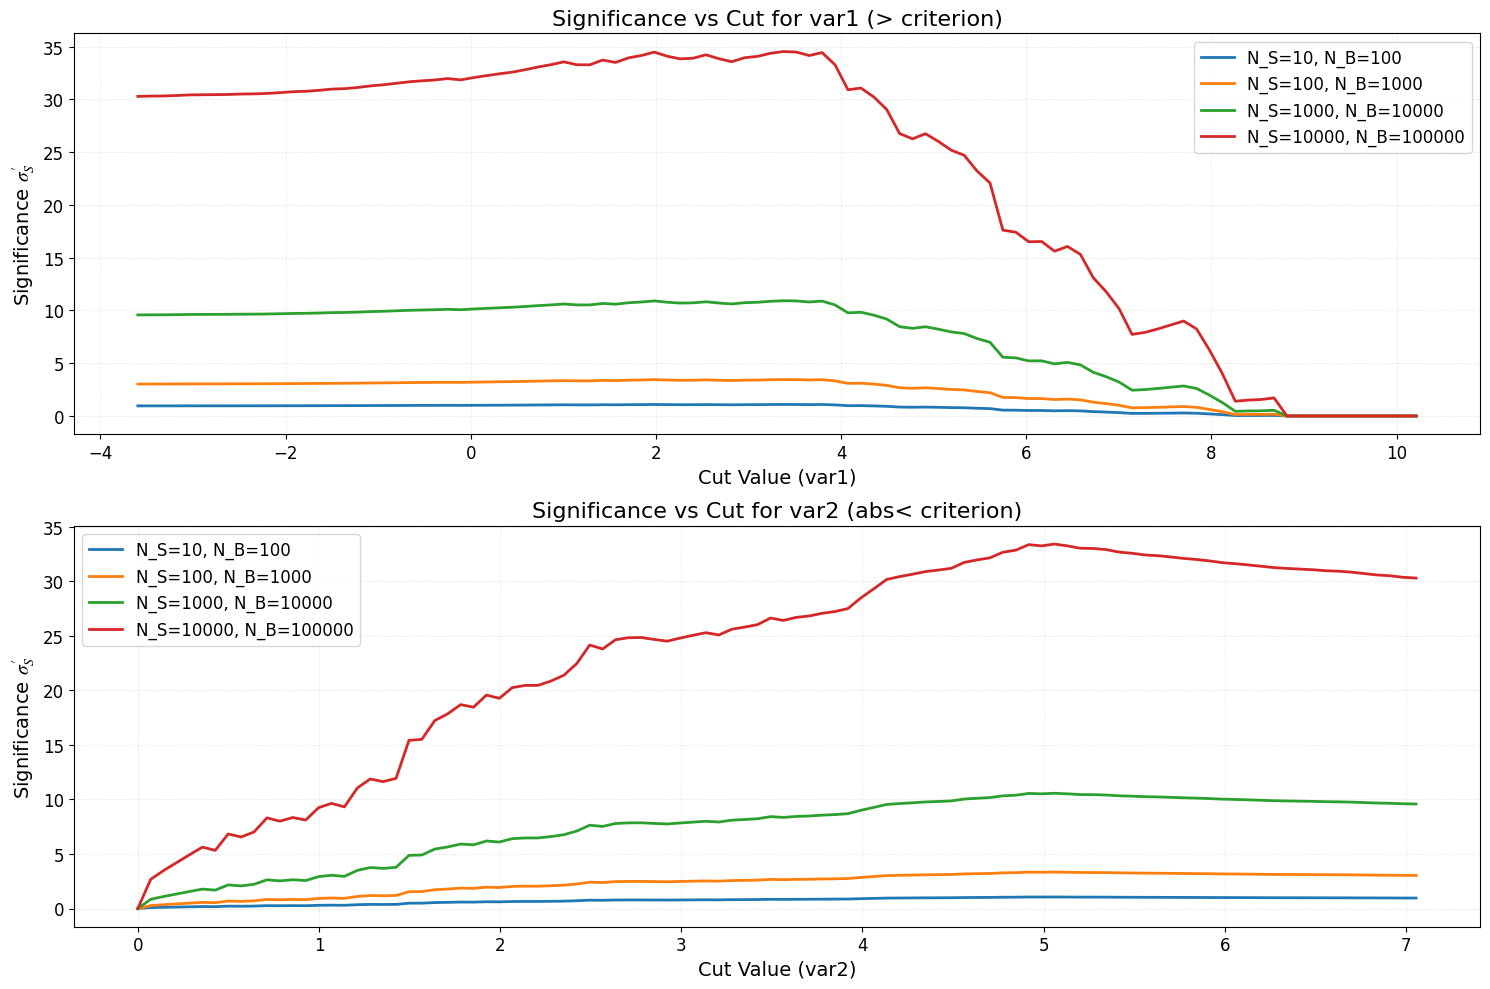

In [27]:
# Exercise 5.3: Plot Significance for Different Scenarios

# sample data 
np.random.seed(42)
df_sig = pd.DataFrame({'var1': np.random.normal(5, 2, 100),
                       'var2': np.random.uniform(0, 10, 100)})
df_bkg = pd.DataFrame({'var1': np.random.normal(3, 3, 1000),
                       'var2': np.random.uniform(2, 12, 1000)})

# variables to plot
all_vars = ['var1', 'var2']

# cut directions
cut_directions = {
    'var1': ('>', None),  # example: cut greater than a certain value.
    'var2': ('abs<', 5)   # example: cut absolute difference from 5 less than a certain value.
}

def plot_significance(df_sig, df_bkg, variables, cut_directions, scenarios):
    """Plot significance for different expected yields scenarios"""
    plt.figure(figsize=(15, 5*len(variables)))

    for i, var in enumerate(variables):
        crit, region = cut_directions[var]
        sig_data = df_sig[var].values
        bkg_data = df_bkg[var].values

        # determine cut range - with protection against edge cases.
        if crit in ['>', '<']:
            min_val = min(np.percentile(sig_data, 1), np.percentile(bkg_data, 1))
            max_val = max(np.percentile(sig_data, 99), np.percentile(bkg_data, 99))
            cut_values = np.linspace(min_val, max_val, 100)
        else:  # abs> or abs<
            ref = df_sig[var].mean() if crit == 'abs<' else df_bkg[var].mean()
            max_dev = max(
                np.percentile(np.abs(sig_data - ref), 99),
                np.percentile(np.abs(bkg_data - ref), 99)
            )
            cut_values = np.linspace(0, max_dev, 100)

        # Pre-calculate efficiencies
        tpr, fpr = [], []
        for x_c in cut_values:
            if crit == '>':
                tpr.append(np.mean(sig_data > x_c))
                fpr.append(np.mean(bkg_data > x_c))
            elif crit == '<':
                tpr.append(np.mean(sig_data < x_c))
                fpr.append(np.mean(bkg_data < x_c))
            elif crit == 'abs>':
                tpr.append(np.mean(np.abs(sig_data - ref) > x_c))
                fpr.append(np.mean(np.abs(bkg_data - ref) > x_c))
            elif crit == 'abs<':
                tpr.append(np.mean(np.abs(sig_data - ref) < x_c))
                fpr.append(np.mean(np.abs(bkg_data - ref) < x_c))

        tpr = np.array(tpr)
        fpr = np.array(fpr)

        # Plot for each scenario with protection against division by zero.
        plt.subplot(len(variables), 1, i+1)
        for N_S, N_B in scenarios:
            N_S_prime = tpr * N_S
            N_B_prime = fpr * N_B

            # compute significance safely
            with np.errstate(divide='ignore', invalid='ignore'):
                significance = np.divide(
                    N_S_prime,
                    np.sqrt(N_S_prime + N_B_prime),
                    out=np.zeros_like(N_S_prime),
                    where=(N_S_prime + N_B_prime) > 0
                )

            plt.plot(cut_values, significance,
                     label=f'N_S={N_S}, N_B={N_B}', linewidth=2)

        plt.xlabel(f'Cut Value ({var})')
        plt.ylabel('Significance $\sigma_S\'$')
        plt.title(f'Significance vs Cut for {var} ({crit} criterion)')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# define scenarios
scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]

# call the function with the defined variables
plot_significance(df_sig, df_bkg, all_vars, cut_directions, scenarios)

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [28]:
# Exercise 6.1
def analyze_cut_order(df_sig, df_bkg, var1, var2, scenario, cut1, cut2, cut_direction1, cut_direction2):
    N_S, N_B = scenario

    def apply_cut(df, var, cut_val, direction):
        crit, region = direction
        if crit == '>':
            return df[df[var] > cut_val]
        elif crit == '<':
            return df[df[var] < cut_val]
        elif crit == 'abs>':
            ref = df_sig[var].mean() if region == 'central_region' else df_bkg[var].mean()
            return df[np.abs(df[var] - ref) > cut_val]
        elif crit == 'abs<':
            ref = df_sig[var].mean() if region == 'central_region' else df_bkg[var].mean()
            return df[np.abs(df[var] - ref) < cut_val]

    # order 1: var1 then var2
    sig_cut1 = apply_cut(df_sig, var1, cut1, cut_direction1)
    bkg_cut1 = apply_cut(df_bkg, var1, cut1, cut_direction1)
    sig_cut12 = apply_cut(sig_cut1, var2, cut2, cut_direction2)
    bkg_cut12 = apply_cut(bkg_cut1, var2, cut2, cut_direction2)
    
    sig12 = (len(sig_cut12) / len(df_sig)) * N_S / np.sqrt(
        (len(sig_cut12) / len(df_sig)) * N_S + 
        (len(bkg_cut12) / len(df_bkg)) * N_B + 1e-10
    )

    # order 2: var2 then var1
    sig_cut2 = apply_cut(df_sig, var2, cut2, cut_direction2)
    bkg_cut2 = apply_cut(df_bkg, var2, cut2, cut_direction2)
    sig_cut21 = apply_cut(sig_cut2, var1, cut1, cut_direction1)
    bkg_cut21 = apply_cut(bkg_cut2, var1, cut1, cut_direction1)
    
    sig21 = (len(sig_cut21) / len(df_sig)) * N_S / np.sqrt(
        (len(sig_cut21) / len(df_sig)) * N_S + 
        (len(bkg_cut21) / len(df_bkg)) * N_B + 1e-10
    )

    return sig12, sig21

In [34]:
# Exercise 6.2: Cut Flow Tables 

def create_cut_flow_table(df_sig, df_bkg, scenario, variables, cuts, cut_directions):
    """Generate cut flow table for a given scenario"""
    N_S, N_B = scenario
    cut_flow = []
    current_sig = df_sig.copy()
    current_bkg = df_bkg.copy()
    
    # initial values (no cuts applied)
    initial_S = len(current_sig)
    initial_B = len(current_bkg)
    cut_flow.append([
        "Initial",
        1.0,
        1.0,
        N_S,
        N_B,
        N_S / np.sqrt(N_S + N_B)
    ])
    
    # apply cuts sequentially
    for var in variables:
        crit = cut_directions[var][0]
        x_c = cuts[var]
        
        # apply cut based on direction
        if crit == '>':
            current_sig = current_sig[current_sig[var] > x_c]
            current_bkg = current_bkg[current_bkg[var] > x_c]
        elif crit == '<':
            current_sig = current_sig[current_sig[var] < x_c]
            current_bkg = current_bkg[current_bkg[var] < x_c]
        
        # calculate metrics
        eff_S = len(current_sig) / initial_S
        eff_B = len(current_bkg) / initial_B
        N_S_prime = eff_S * N_S
        N_B_prime = eff_B * N_B
        sig = N_S_prime / np.sqrt(N_S_prime + N_B_prime + 1e-10)
        
        cut_flow.append([
            f"{var} {crit} {x_c:.2f}",  # cut description
            f"{eff_S:.4f}",              # signal efficiency
            f"{eff_B:.4f}",              # Background efficiency
            f"{N_S_prime:.1f}",          # remaining signal
            f"{N_B_prime:.1f}",          # remaining background
            f"{sig:.3f}"                 # significance
        ])
    
    return tabulate(cut_flow, 
                   headers=["Cut", "ϵ_S", "ϵ_B", "N_S'", "N_B'", "σ_S'"],
                   tablefmt='grid',
                   stralign="right")

# Example usage
if 'optimal_cuts_per_scenario' in locals():
    print("\nCut-Flow Tables:")
    for scenario in scenarios:
        if scenario in optimal_cuts_per_scenario:
            cuts = optimal_cuts_per_scenario[scenario]
            print(f"\nScenario {scenario[0]} signal, {scenario[1]} background:")
            print(create_cut_flow_table(
                df_sig, df_bkg, 
                scenario, 
                list(cuts.keys()), 
                cuts, 
                cut_directions
            ))
else:
    print("Error: optimal_cuts_per_scenario not defined. Run Exercise 6.1 first.")



Cut-Flow Tables:

Scenario 10 signal, 100 background:
+-----------------+-------+--------+--------+--------+----------+
|             Cut |   ϵ_S |    ϵ_B |   N_S' |   N_B' |     σ_S' |
+=================+=======+========+========+========+==========+
|         Initial | 1     | 1      |   10   |  100   | 0.953463 |
+-----------------+-------+--------+--------+--------+----------+
| M_TR_2 > 908.01 | 0.387 | 0.018  |    3.9 |    1.8 | 1.625    |
+-----------------+-------+--------+--------+--------+----------+
|        R > 0.53 | 0.291 | 0.0042 |    2.9 |    0.4 | 1.595    |
+-----------------+-------+--------+--------+--------+----------+
|   M_R > 1574.98 | 0.124 | 0.0006 |    1.2 |    0.1 | 1.088    |
+-----------------+-------+--------+--------+--------+----------+

Scenario 100 signal, 1000 background:
+-----------------+-------+--------+--------+--------+---------+
|             Cut |   ϵ_S |    ϵ_B |   N_S' |   N_B' |    σ_S' |
+=================+=======+========+========+=====

In [35]:
# Exercise 6.3 Cut order analysis
def analyze_cut_order(df_sig, df_bkg, var1, var2, scenario, cut1, cut2, cut_direction1, cut_direction2):
    N_S, N_B = scenario

    def apply_cut(df, var, cut_val, direction):
        crit, _ = direction
        if crit == '>':
            return df[df[var] > cut_val]
        elif crit == '<':
            return df[df[var] < cut_val]
        return df

    # order 1: var1 then var2
    sig_cut1 = apply_cut(df_sig, var1, cut1, cut_direction1)
    bkg_cut1 = apply_cut(df_bkg, var1, cut1, cut_direction1)
    sig_cut12 = apply_cut(sig_cut1, var2, cut2, cut_direction2)
    bkg_cut12 = apply_cut(bkg_cut1, var2, cut2, cut_direction2)
    
    sig12 = (len(sig_cut12) / len(df_sig)) * N_S / np.sqrt((len(sig_cut12) / len(df_sig)) * N_S + (len(bkg_cut12) / len(df_bkg)) * N_B + 1e-10)

    # order 2: var2 then var1
    sig_cut2 = apply_cut(df_sig, var2, cut2, cut_direction2)
    bkg_cut2 = apply_cut(df_bkg, var2, cut2, cut_direction2)
    sig_cut21 = apply_cut(sig_cut2, var1, cut1, cut_direction1)
    bkg_cut21 = apply_cut(bkg_cut2, var1, cut1, cut_direction1)
    
    sig21 = (len(sig_cut21) / len(df_sig)) * N_S / np.sqrt((len(sig_cut21) / len(df_sig)) * N_S + (len(bkg_cut21) / len(df_bkg)) * N_B + 1e-10)

    return sig12, sig21

# Perform cut order analysis
print("\nCut Order Analysis:")
scenario_example = (1000, 10000)
if scenario_example in optimal_cuts_per_scenario:
    cuts = optimal_cuts_per_scenario[scenario_example]
    if len(cuts) >= 2:
        var1, var2 = list(cuts.keys())[0], list(cuts.keys())[1]
        cut1, cut2 = cuts[var1], cuts[var2]
        sig12, sig21 = analyze_cut_order(df_sig, df_bkg, var1, var2, scenario_example,
                                       cut1, cut2, cut_directions[var1], cut_directions[var2])
        print(f"Scenario {scenario_example[0]} signal, {scenario_example[1]} background:")
        print(f"Significance if cutting {var1} then {var2}: {sig12:.3f}")
        print(f"Significance if cutting {var2} then {var1}: {sig21:.3f}")
    else:
        print(f"Not enough variables for cut order analysis in scenario {scenario_example}")
else:
    print(f"Scenario {scenario_example} not found in optimal cuts")


Cut Order Analysis:
Scenario 1000 signal, 10000 background:
Significance if cutting M_TR_2 then R: 15.947
Significance if cutting R then M_TR_2: 15.947


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



In [33]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 196.6 kB/s eta 0:00:0000:0100:06


<Figure size 1000x800 with 0 Axes>

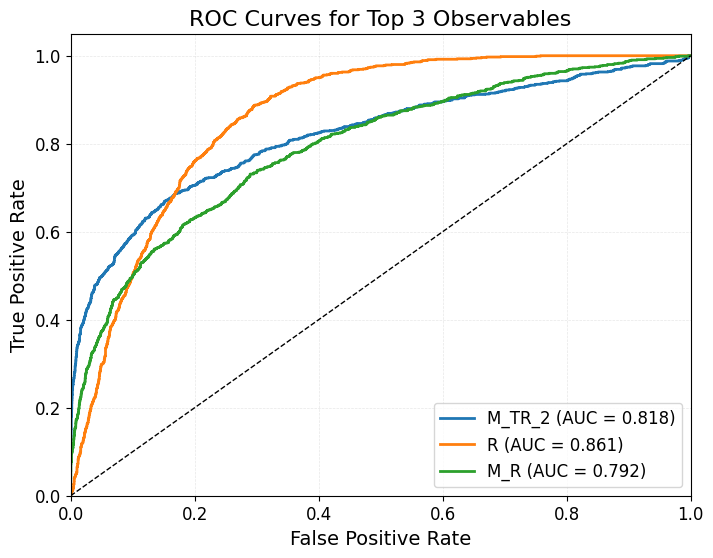

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curves(df_sig, df_bkg, variables, title="ROC Curves", ax=None):
    """
    Plot ROC curves for multiple variables and compute AUC
    
    Args:
        df_sig: DataFrame with signal events
        df_bkg: DataFrame with background events
        variables: List of variables to plot
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    # combine signal and background with labels.
    y_true = np.concatenate([np.ones(len(df_sig)), np.zeros(len(df_bkg))])
    
    for var in variables:
        # Get values for current variable
        y_score = np.concatenate([df_sig[var], df_bkg[var]])
        
        # compute ROC curve
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)
        
        # Plot curve
        ax.plot(fpr, tpr, lw=2, 
                label=f'{var} (AUC = {roc_auc:.3f})')
    
    ax.plot([0, 1], [0, 1], 'k--', lw=1)  # Diagonal line
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc="lower right")
    ax.grid(alpha=0.3)
    
    return ax

# get top 3 variables from earlier analysis.
top_vars = list(optimal_cuts_per_scenario[(1000, 10000)].keys())[:3]

# plot ROC curves for top variables
plt.figure(figsize=(10, 8))
plot_roc_curves(df_sig, df_bkg, top_vars, 
               title="ROC Curves for Top 3 Observables")
plt.show()

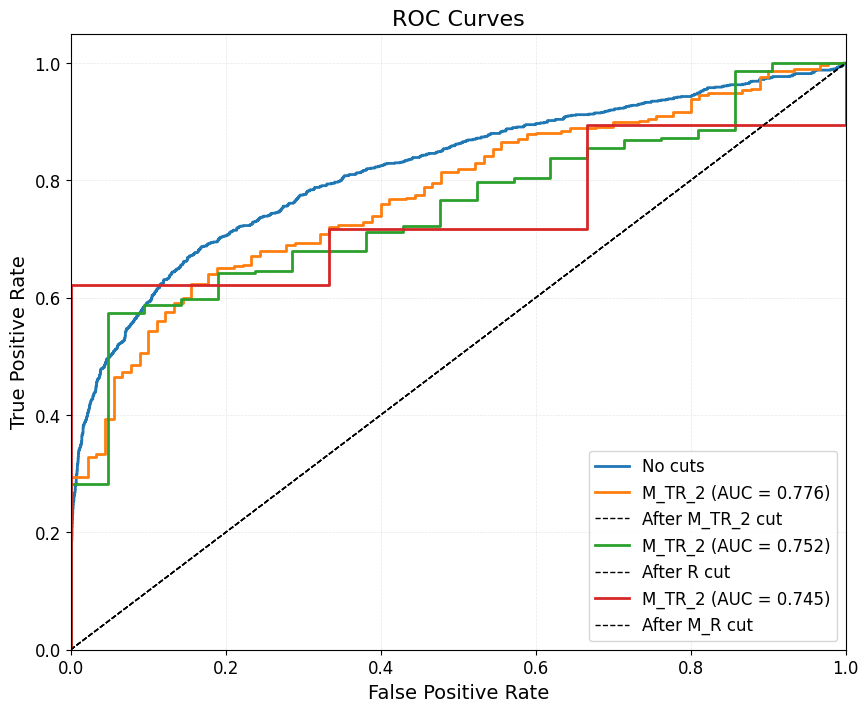

In [37]:
# Exercise 7.3: ROC After Successive Selections

def plot_roc_after_selections(df_sig, df_bkg, variables, cuts, cut_directions):
    """
    Plot ROC curves after each successive selection
    
    Args:
        df_sig: Signal DataFrame
        df_bkg: Background DataFrame
        variables: Ordered list of variables to cut on
        cuts: Dictionary of {variable: cut_value}
        cut_directions: Dictionary of cut directions
    """
    fig, ax = plt.subplots(figsize=(10, 8))
    current_sig = df_sig.copy()
    current_bkg = df_bkg.copy()
    
    # initial ROC - no cuts.
    plot_roc_curves(current_sig, current_bkg, variables[:1], 
                   title="ROC After Successive Cuts", ax=ax)
    lines = ax.get_lines()
    lines[0].set_label('No cuts')
    
    # apply cuts sequentially and plot ROC.
    for i, var in enumerate(variables):
        if var not in cuts:
            continue
            
        crit = cut_directions[var][0]
        x_c = cuts[var]
        
        # apply cut
        if crit == '>':
            current_sig = current_sig[current_sig[var] > x_c]
            current_bkg = current_bkg[current_bkg[var] > x_c]
        elif crit == '<':
            current_sig = current_sig[current_sig[var] < x_c]
            current_bkg = current_bkg[current_bkg[var] < x_c]
        
        # plot ROC after this cut
        plot_roc_curves(current_sig, current_bkg, variables[:1], ax=ax)
        lines = ax.get_lines()
        lines[-1].set_label(f'After {var} cut')
    
    ax.legend(loc="lower right")
    plt.show()

# example usage with top 3 variables
plot_roc_after_selections(
    df_sig, df_bkg,
    variables=top_vars,
    cuts=optimal_cuts_per_scenario[(1000, 10000)],
    cut_directions=cut_directions
)

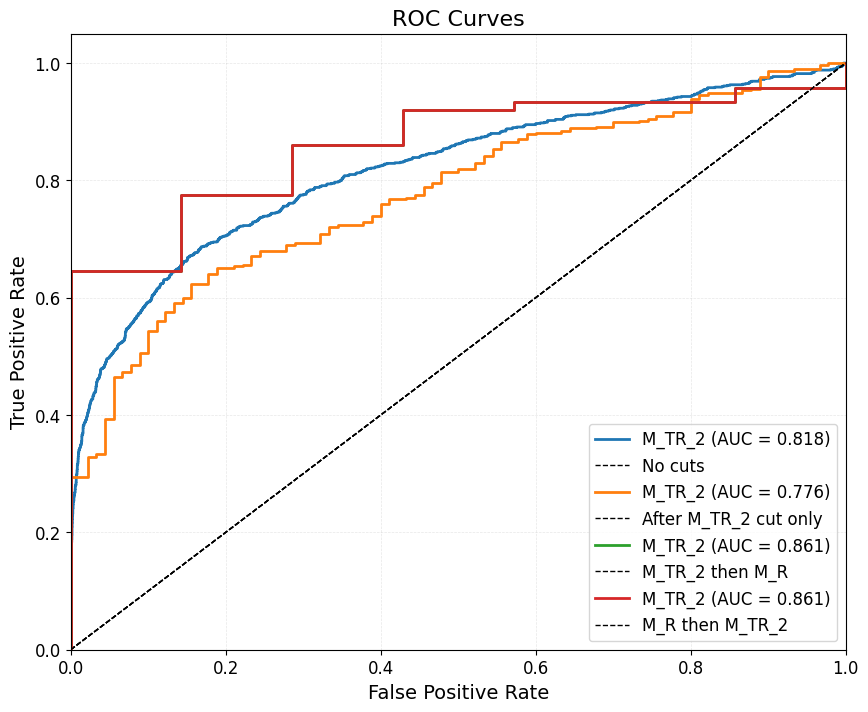

In [38]:
# Exercise 7.4 -Cut order Comparison-
def compare_cut_orders(df_sig, df_bkg, var_pair, cuts, cut_directions):
    """
    Compare ROC curves for different cut orders
    
    Args:
        df_sig: Signal DataFrame
        df_bkg: Background DataFrame
        var_pair: Tuple of 2 variables to compare
        cuts: Dictionary of optimal cuts
        cut_directions: Dictionary of cut directions
    """
    var1, var2 = var_pair
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Order 1: var1 then var2
    sig1 = df_sig[df_sig[var1] > cuts[var1]] if cut_directions[var1][0] == '>' else df_sig[df_sig[var1] < cuts[var1]]
    bkg1 = df_bkg[df_bkg[var1] > cuts[var1]] if cut_directions[var1][0] == '>' else df_bkg[df_bkg[var1] < cuts[var1]]
    sig12 = sig1[sig1[var2] > cuts[var2]] if cut_directions[var2][0] == '>' else sig1[sig1[var2] < cuts[var2]]
    bkg12 = bkg1[bkg1[var2] > cuts[var2]] if cut_directions[var2][0] == '>' else bkg1[bkg1[var2] < cuts[var2]]
    
    # Order 2: var2 then var1
    sig2 = df_sig[df_sig[var2] > cuts[var2]] if cut_directions[var2][0] == '>' else df_sig[df_sig[var2] < cuts[var2]]
    bkg2 = df_bkg[df_bkg[var2] > cuts[var2]] if cut_directions[var2][0] == '>' else df_bkg[df_bkg[var2] < cuts[var2]]
    sig21 = sig2[sig2[var1] > cuts[var1]] if cut_directions[var1][0] == '>' else sig2[sig2[var1] < cuts[var1]]
    bkg21 = bkg2[bkg2[var1] > cuts[var1]] if cut_directions[var1][0] == '>' else bkg2[bkg2[var1] < cuts[var1]]
    
    # Plot all scenarios
    plot_roc_curves(df_sig, df_bkg, [var1], title=f"Cut Order Comparison: {var1} vs {var2}", ax=ax)
    ax.get_lines()[-1].set_label('No cuts')
    
    plot_roc_curves(sig1, bkg1, [var1], ax=ax)
    ax.get_lines()[-1].set_label(f'After {var1} cut only')
    
    plot_roc_curves(sig12, bkg12, [var1], ax=ax)
    ax.get_lines()[-1].set_label(f'{var1} then {var2}')
    
    plot_roc_curves(sig21, bkg21, [var1], ax=ax)
    ax.get_lines()[-1].set_label(f'{var2} then {var1}')
    
    ax.legend(loc="lower right")
    plt.show()

# Example
corr_matrix = df_sig[top_vars].corr().abs()
np.fill_diagonal(corr_matrix.values, 0)
var1, var2 = corr_matrix.stack().idxmax()
compare_cut_orders(df_sig, df_bkg, (var1, var2), 
                  optimal_cuts_per_scenario[(1000, 10000)], 
                  cut_directions)

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [39]:
from sklearn.metrics import roc_curve, auc
from scipy.linalg import pinvh

# set random seed for reproducibility.
np.random.seed(42)

# ------------------- Data Preparation ---------------------------
# generate synthetic data
df_sig = pd.DataFrame({
    'M_R': np.random.normal(1500, 300, 1000),
    'M_TR_2': np.random.normal(800, 200, 1000),
    'R': np.random.normal(0.6, 0.1, 1000)
})
df_bkg = pd.DataFrame({
    'M_R': np.random.normal(1000, 400, 5000),
    'M_TR_2': np.random.normal(500, 250, 5000),
    'R': np.random.normal(0.4, 0.15, 5000)
})

variables = ['M_R', 'M_TR_2', 'R']

#------------------- Compute Covariance Matrices --------------------
def compute_covariance_matrices(X_sig, X_bkg):
    """Compute between-class (SB) and within-class (SW) covariance matrices"""
    m_sig = np.mean(X_sig, axis=0)
    m_bkg = np.mean(X_bkg, axis=0)
    
    # between-class covariance
    diff = (m_sig - m_bkg).reshape(-1, 1)
    SB = diff @ diff.T
    
    # within-class covariance (using unbiased estimator)
    SW_sig = np.cov(X_sig.T, bias=False) * (len(X_sig)-1)
    SW_bkg = np.cov(X_bkg.T, bias=False) * (len(X_bkg)-1)
    SW = (SW_sig + SW_bkg) / (len(X_sig) + len(X_bkg) - 2)
    
    return SB, SW, m_sig, m_bkg

X_sig = df_sig[variables].values
X_bkg = df_bkg[variables].values
SB, SW, m_sig, m_bkg = compute_covariance_matrices(X_sig, X_bkg)

print("Between-Class Covariance (SB):\n", SB)
print("\nWithin-Class Covariance (SW):\n", SW)

Between-Class Covariance (SB):
 [[2.65939488e+05 1.62943797e+05 1.01123106e+02]
 [1.62943797e+05 9.98373024e+04 6.19591434e+01]
 [1.01123106e+02 6.19591434e+01 3.84519148e-02]]

Within-Class Covariance (SW):
 [[ 1.52776426e+05 -1.34253877e+03 -4.98533979e-01]
 [-1.34253877e+03  5.73813015e+04  7.79505670e-01]
 [-4.98533979e-01  7.79505670e-01  2.07636204e-02]]



Linear Discriminant Coefficients (w):
 [3.45388014e-03 5.46068550e-03 9.32147257e+00]


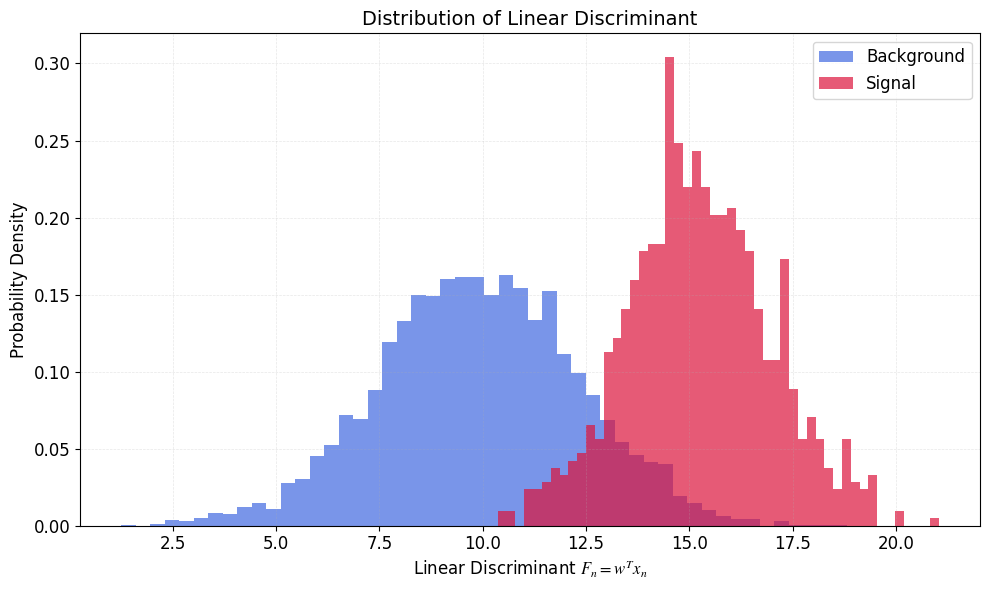

In [40]:
# ---------------------  Compute Linear Discriminant ---------------------
def compute_linear_discriminant(SW, mean_diff, regularization=1e-6):
    """Compute LDA coefficients with regularization"""
    # Add regularization to handle potential singular matrices
    SW_reg = SW + regularization * np.eye(SW.shape[0])
    try:
        w = np.linalg.solve(SW_reg, mean_diff)
    except np.linalg.LinAlgError:
        w = pinvh(SW_reg) @ mean_diff  # use pseudo inverse if still singular
    return w

w = compute_linear_discriminant(SW, m_sig - m_bkg)
print("\nLinear Discriminant Coefficients (w):\n", w)

# Project data onto discriminant axis
F_sig = X_sig @ w
F_bkg = X_bkg @ w

# plot distributions
plt.figure(figsize=(10, 6))
plt.hist(F_bkg, bins=50, density=True, alpha=0.7, 
         label='Background', color='royalblue')
plt.hist(F_sig, bins=50, density=True, alpha=0.7, 
         label='Signal', color='crimson')
plt.xlabel('Linear Discriminant $F_n = w^T x_n$', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Distribution of Linear Discriminant', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

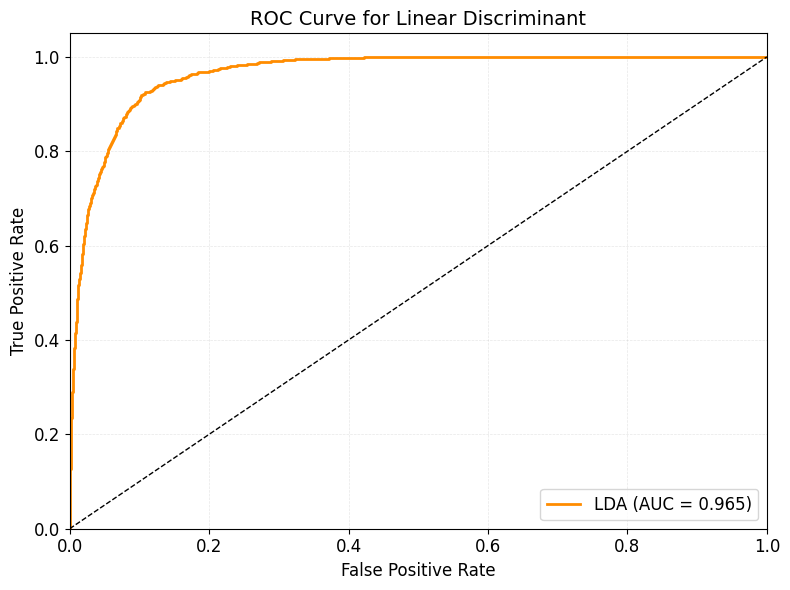

In [41]:
# -------------- ROC Curve for Linear Discriminant ----------------
def plot_roc_curve(F_sig, F_bkg):
    """Plot ROC curve with AUC calculation"""
    y_true = np.concatenate([np.ones_like(F_sig), np.zeros_like(F_bkg)])
    y_score = np.concatenate([F_sig, F_bkg])
    
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'LDA (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curve for Linear Discriminant', fontsize=14)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return fpr, tpr

fpr, tpr = plot_roc_curve(F_sig, F_bkg)

In [42]:
# ---------- Maximal Significance for Scenarios ---------------                               
def compute_max_significance(F_sig, F_bkg, scenarios):
    """Compute maximal significance for given scenarios"""
    results = {}
    all_F = np.concatenate([F_sig, F_bkg])
    y_true = np.concatenate([np.ones_like(F_sig), np.zeros_like(F_bkg)])
    
    # Sort by discriminant score (descending)
    sort_idx = np.argsort(all_F)[::-1]
    F_sorted = all_F[sort_idx]
    y_sorted = y_true[sort_idx]
    
    # cumulative sums
    tp = np.cumsum(y_sorted)
    fp = np.cumsum(1 - y_sorted)
    
    # Efficiencies
    eff_sig = tp / len(F_sig)
    eff_bkg = fp / len(F_bkg)
    
    for N_S, N_B in scenarios:
        S_prime = eff_sig * N_S
        B_prime = eff_bkg * N_B
        
        with np.errstate(divide='ignore', invalid='ignore'):
            significance = np.where((S_prime + B_prime) > 0, 
                                  S_prime / np.sqrt(S_prime + B_prime), 0)
        
        max_idx = np.argmax(significance)
        results[(N_S, N_B)] = {
            'max_sig': significance[max_idx],
            'optimal_cut': F_sorted[max_idx],
            'eff_sig': eff_sig[max_idx],
            'eff_bkg': eff_bkg[max_idx]
        }
    
    return results

In [133]:
# define scenarios from Exercise 5
scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]

max_sig_results = compute_max_significance(F_sig, F_bkg, scenarios)

# results
print("\nMaximal Significance for Different Scenarios:")
print("{:<15} {:<15} {:<15} {:<15} {:<15}".format(
    "Scenario", "Max σ'", "Optimal Cut", "ϵ_S", "ϵ_B"))
for scenario, res in max_sig_results.items():
    print("{:<15} {:<15.3f} {:<15.3f} {:<15.3f} {:<15.3f}".format(
        f"{scenario[0]},{scenario[1]}",
        res['max_sig'],
        res['optimal_cut'],
        res['eff_sig'],
        res['eff_bkg']))


Maximal Significance for Different Scenarios:
Scenario        Max σ'          Optimal Cut     ϵ_S             ϵ_B            
10,100          2.209           14.353          0.705           0.031          
100,1000        6.984           14.353          0.705           0.031          
1000,10000      22.085          14.353          0.705           0.031          
10000,100000    69.840          14.353          0.705           0.031          
